# Análise de Dados Imobiliários

Este material contém uma solução para um desafio envolvendo análise de dados e é organizado de maneira detalhada e acessível, podendo ser entendida por quem é iniciante na linguagem Python, principalmente se tiver familiaridade com a biblioteca Pandas.

**Desafio:** Analisar os dados de uma empresa de aluguel de imóveis e fazer o devido tratamento de dados, principalmente para os inúmeros valores nulos, conhecidos como <i>valores missing</i>. O foco da análise são os imóveis residenciais, um subconjunto da base de dados original, que precisa ter os outliers, isto é, os dados com valores muito discrepantes dos outros, retirados.

Dentro do [repositório](https://github.com/DrAdriano/Analise-de-dados-imobiliarios) você encontrará: a base de dados, que contém informações, como valor do aluguel e condomínio, de aproximadamente 33.000 imóveis; a solução detalhada, feita no Jupyter Nootebook, em que estão explicações de como foram desenvolvidas ideias; a solução final, adaptada para o Visual Studio Code a partir da solução detalhada, mas desenvolvida sem a poluição visual dos comentários; a imagem com o esquema do Box Plot, usada no decorrer do texto; e a pasta com arquivos gerados no código, como a base de dados tratada, gráficos e capturas de tela.

## Sumário

1. Bibliotecas usadas
2. Passo a passo do código
    * 2.1 Importando a base de dados
    * 2.2 Visualizando a base de dados
        * 2.2.1 Mostrando os tipos de dados
        * 2.2.2 Mostrando os tipos de imóveis
        * 2.2.3 Identificando os imóveis residenciais
    * 2.3 Tratando os dados
        * 2.3.1 Excluindo colunas desnecessárias
        * 2.3.2 Tratando valores nulos do aluguel
        * 2.3.3 Tratando valores nulos do condomínio
    * 2.4 Analisando os dados
        * 2.4.1 Calculando do valor bruto e do metro quadrado
        * 2.4.2 Calculando os valores estatísticos descritivos por bairro
          * 2.4.2.1 Aluguel
          * 2.4.2.2 Valor Bruto
        * 2.4.3 Removendo os outliers
          * 2.4.3.1 Para todos os imóveis residenciais juntos
          * 2.4.3.2 Para os tipos de imóveis residenciais
        * 2.4.4 Recalculando dos valores estatísticos
           * 2.4.4.1 Aluguel 
           * 2.4.4.2 Valor Bruto
3. Conclusões

## 1. Bibliotecas usadas 

As principais bibliotecas usadas: [Pandas](https://pandas.pydata.org/), pois estamos trabalhando com base de dados e sua manipulação e [Matplotlib Pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html), para fazer a construção de gráficos.

In [682]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Passo a passo do código 


Vamos começar organizando o passo a passo do código, ou seja, a lógica de programação. Dessa maneira, temos:

* Passo 1: Importar a base de dados
* Passo 2: Visualizar a base de dados
    * 2.1 Mostrar os tipos de dados
    * 2.2 Mostrar os tipos de imóveis
    * 2.3 Identificar os imóveis residenciais
* Passo 3: Tratar os dados
    * 3.1 Excluir colunas desnecessárias
    * 3.2 Tratar valores nulos do aluguel
    * 3.3 Tratar valores nulos do condomínio
* Passo 4: Analisar os dados
    * 4.1 Calcular do valor bruto e do metro quadrado
    * 4.2 Calcular os valores estatísticos descritivos por bairro
    * 4.3 Remover os outliers
    * 4.4 Recalculando dos valores estatísticos

### 2.1 Importando a base de dados 
Importamos o arquivo, que está localizado na mesma pasta que está esse Jupyter Notebook. Adicionamos no comando que o separador de itens é o ponto e vírgula.

In [683]:
dados = pd.read_csv('Base de dados de imóveis.csv', sep = ';')

### 2.2 Visualizando a base de dados
Nessa etapa, vamos imprimir a tabela para entendermos como estão organizados os dados, quais informações estão disponíveis e ter um direcionamento para o tratamento de dados. Perceba que, ao importar uma tabela para o Python, usando o Pandas, ela se torna um Data Frame.

In [684]:
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Aluguel,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [685]:
type(dados)

pandas.core.frame.DataFrame

In [686]:
dados.shape

(32960, 9)

In [687]:
print('A base de dados apresenta {} registros de imóveis e {} colunas com informações sobre os mesmos.'.format(dados.shape[0], dados.shape[1]))

A base de dados apresenta 32960 registros de imóveis e 9 colunas com informações sobre os mesmos.


#### 2.2.1 Mostrando os tipos de dados

Vamos começar usando a função "dados.info()", que retornar a quantidade de valores não nulos e o tipo de variável em cada coluna, mas o nosso foco é na segunda coluna de informação.

In [688]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Aluguel     32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [689]:
dados.dtypes

Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Aluguel       float64
Condominio    float64
IPTU          float64
dtype: object

In [690]:
tipos_de_dados = pd.DataFrame(dados.dtypes, columns = ['Tipos de Dados'])
tipos_de_dados.columns.name = 'Variáveis'
tipos_de_dados

Variáveis,Tipos de Dados
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Aluguel,float64
Condominio,float64
IPTU,float64


#### 2.2.2 Mostrando os tipos de imóveis

Há diferentes maneiras de mostrar os tipos de imóveis da base de dados, vamos mostrar uma que deixa a tabela organizada.

In [691]:
# Mostrando a coluna do tipo de imóveis.
dados['Tipo']
# Um maneira alternativa é usar: "dados.Tipo"

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [692]:
tipo_de_imovel = dados['Tipo']

In [693]:
type(tipo_de_imovel)
# Uma coluna de um Data Frame é uma Série.

pandas.core.series.Series

In [694]:
# Comando para deixar apenas o primeiro tipo de cada imóvel.
tipo_de_imovel.drop_duplicates()

0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

In [695]:
# Entretanto, para salvar essa configuração, é preciso o "inplace = True".
tipo_de_imovel

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [696]:
tipo_de_imovel.drop_duplicates(inplace = True)
tipo_de_imovel

0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

In [697]:
# Deixando os dados mais bonitos. 
tipo_de_imovel = pd.DataFrame(tipo_de_imovel)
tipo_de_imovel

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
7,Casa de Condomínio
16,Prédio Inteiro
17,Flat
29,Loja/Salão
80,Galpão/Depósito/Armazém
83,Casa Comercial


In [698]:
# Perceba que os números dos índice contunuam sendo os da Base de Dados original, 
# mas podemos alterar isso.
tipo_de_imovel.index

Int64Index([    0,     1,     2,     3,     7,    16,    17,    29,    80,
               83,   117,   159,   207,   347,   589,  2157,  3354,  4379,
             4721,  6983,  9687, 23614],
           dtype='int64')

In [699]:
print(f'Há {tipo_de_imovel.shape[0]} tipos de imóveis.')

Há 22 tipos de imóveis.


In [700]:
range(tipo_de_imovel.shape[0])

range(0, 22)

In [701]:
# Correção de índices.
tipo_de_imovel.index = range(tipo_de_imovel.shape[0])
tipo_de_imovel.index

RangeIndex(start=0, stop=22, step=1)

In [702]:
# Definindo a função de correção de índices, pois será muito usada.
def adj_index(Data_Frame):
    Data_Frame.index = range(Data_Frame.shape[0])

In [703]:
tipo_de_imovel

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


In [704]:
# Colocando título na coluna dos índices.
tipo_de_imovel.columns.name = 'Id'
tipo_de_imovel

Id,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


#### 2.2.3 Identificando os imóveis residenciais

Nessa seção, vou começar organizando uma tabela apenas com os imóveis residenciais, ou seja, observando a tabela "tipo_de_imovel", vamos selecionar apenas os que são dos tipos Quitinete, Casa, Apartamento, Casa de Condomínio e Casa de Vila. 

In [705]:
list(dados['Tipo'].drop_duplicates())

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

In [706]:
# Seleção dos tipos residenciais.
residencial = [
    'Apartamento',
    'Casa',
    'Casa de Condomínio',
    'Casa de Vila',
    'Quitinete']

In [707]:
selecao = dados['Tipo'].isin(residencial)
# A função "isin()" verifica quais elementos de uma tabela estão contidos em uma lista.
# Cria uma série booleana, ou seja, com valores "True" ou "False".
selecao

0         True
1         True
2        False
3         True
4         True
         ...  
32955     True
32956     True
32957     True
32958     True
32959    False
Name: Tipo, Length: 32960, dtype: bool

In [708]:
dados_residenciais = dados[selecao]
dados_residenciais

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Aluguel,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [709]:
list(dados_residenciais['Tipo'].drop_duplicates())
# Assim verificamos quais os elementos contidos na atual coluna dos tipo de imóveis.

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

In [710]:
print(f'Temos {dados_residenciais.shape[0]} imóveis residenciais, dentre os {dados.shape[0]} imóveis totais, uma diminuição de, aproximadamente, {(1-dados_residenciais.shape[0]/dados.shape[0])*100:,.0f}%.')

Temos 22580 imóveis residenciais, dentre os 32960 imóveis totais, uma diminuição de, aproximadamente, 31%.


In [711]:
# Renumerando os índices, siminar ao que fizemos na seção passada.
adj_index(dados_residenciais)
dados_residenciais

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Aluguel,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


Text(0.5, 1.0, 'Imóveis Residenciais por Tipo')

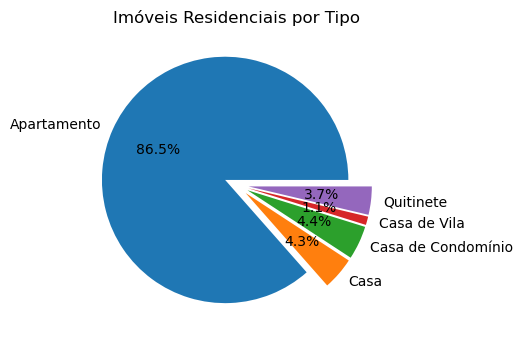

In [712]:
# Criando um gráfico dos tipos de imóveis.
plt.rc('figure', figsize = (8, 4))
area = plt.figure()
g1 = area.add_subplot(1, 1, 1)
grupo1 = dados_residenciais.groupby('Tipo')['Aluguel']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g1.set_title('Imóveis Residenciais por Tipo')

In [713]:
# Salvando o gráfico
area.savefig('Arquivos_gerados_no_código/ImoveisResidenciaisPorTipo.png', dpi = 300, bbox_inches = 'tight')

In [714]:
dados_residenciais.to_csv('Arquivos_gerados_no_código/Base de dados de imóveis residenciais - Sem tratamento.csv', sep = ';', index = False)
# Exportando a nova base de dados, que contem apenas os imóveis residenciais.

### 2.3 Tratando os dados  

Voltamos a usar a função ".info()", agora com o foco nos números não nulos. Outras funções importantes são: ".isnull()" que reconstroí a tabela com valores boleanos, ou seja, "True" para os dados nulos e "False" para os não nulos e, sua antítese, ".notnull()".

In [715]:
dados_residenciais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22580 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        22580 non-null  object 
 1   Bairro      22580 non-null  object 
 2   Quartos     22580 non-null  int64  
 3   Vagas       22580 non-null  int64  
 4   Suites      22580 non-null  int64  
 5   Area        22580 non-null  int64  
 6   Aluguel     22571 non-null  float64
 7   Condominio  20765 non-null  float64
 8   IPTU        15795 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.6+ MB


In [716]:
dados_residenciais.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Aluguel,Condominio,IPTU
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
22575,False,False,False,False,False,False,False,False,False
22576,False,False,False,False,False,False,False,False,False
22577,False,False,False,False,False,False,False,False,False
22578,False,False,False,False,False,False,False,False,False


In [717]:
dados_residenciais.notnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Aluguel,Condominio,IPTU
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,False,False
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...
22575,True,True,True,True,True,True,True,True,True
22576,True,True,True,True,True,True,True,True,True
22577,True,True,True,True,True,True,True,True,True
22578,True,True,True,True,True,True,True,True,True


#### 2.3.1 Excluindo colunas desnecessárias

Para a análise, não são necessárias as colunas "Quartos", "Vagas", "Suites" e "IPTU". O IPTU é um imposto para o dono do imóvel, não para o locatário, por isso não incluímos na conta com aluguel e condomínio.

In [718]:
dados_residenciais = dados_residenciais.drop(["Quartos", "Vagas", "Suites", "IPTU"], axis=1)
dados_residenciais

,Tipo,Bairro,Area,Aluguel,Condominio
0,Quitinete,Copacabana,40,1700.0,500.0
1,Casa,Jardim Botânico,100,7000.0,NaN
2,Apartamento,Centro,15,800.0,390.0
3,Apartamento,Higienópolis,48,800.0,230.0
4,Apartamento,Vista Alegre,70,1200.0,NaN
...,...,...,...,...,...
22575,Apartamento,Méier,70,900.0,490.0
22576,Quitinete,Centro,27,800.0,350.0
22577,Apartamento,Jacarepaguá,78,1800.0,800.0
22578,Apartamento,São Francisco Xavier,48,1400.0,509.0


#### 2.3.2 Tratando valores nulos do aluguel

O valor mais importante da tabela é o aluguel, esse é um número essencial para chegar nos resultados desejados.

In [719]:
# Verificando os imóveis com valores nulos.
dados_residenciais[dados_residenciais['Aluguel'].isnull()]

,Tipo,Bairro,Area,Aluguel,Condominio
58,Apartamento,Barra da Tijuca,70,NaN,970.0
1492,Apartamento,Leme,75,NaN,878.0
1683,Casa,Campo Grande,363,NaN,NaN
2012,Apartamento,Botafogo,95,NaN,1010.0
2034,Apartamento,Copacabana,72,NaN,850.0
4941,Casa,Campo Grande,100,NaN,NaN
8568,Apartamento,Leme,75,NaN,878.0
8947,Apartamento,Glória,135,NaN,910.0
9149,Apartamento,Gávea,105,NaN,880.0


In [720]:
print(f"Existem {dados_residenciais[dados_residenciais['Aluguel'].isnull()].shape[0]} imóveis com valores nulos.")

Existem 9 imóveis com valores nulos.


In [721]:
# Podemos excluir os valores nulos, pois são poucos. 
dados_residenciais.dropna(subset = ['Aluguel'], inplace = True)
dados_residenciais.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22571 entries, 0 to 22579
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        22571 non-null  object 
 1   Bairro      22571 non-null  object 
 2   Area        22571 non-null  int64  
 3   Aluguel     22571 non-null  float64
 4   Condominio  20758 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.0+ MB


#### 2.3.3 Tratando valores nulos do condomínio

Começamos visualizando a quatidade de dados com valores nulos no condomínio. A partir daí, podemos excluir os Apartamentos, Quitinetes e Casa de Condomínio da base de dados, pois estes costumam ter custo de condomínio; Para o caso das Casas e Casas de Vila, vamos atribuir o valor zero.

In [722]:
dados_residenciais[dados_residenciais['Condominio'].isnull()]

,Tipo,Bairro,Area,Aluguel,Condominio
1,Casa,Jardim Botânico,100,7000.0,NaN
4,Apartamento,Vista Alegre,70,1200.0,NaN
6,Casa de Condomínio,Barra da Tijuca,750,22000.0,NaN
7,Casa de Condomínio,Ramos,65,1000.0,NaN
8,Apartamento,Centro,36,1200.0,NaN
...,...,...,...,...,...
22510,Casa,Campo Grande,50,600.0,NaN
22516,Casa de Vila,Pavuna,55,600.0,NaN
22535,Casa,Recreio dos Bandeirantes,352,6500.0,NaN
22547,Casa,Bento Ribeiro,60,1400.0,NaN


In [723]:
print(f"Existem {dados_residenciais[dados_residenciais['Condominio'].isnull()].shape[0]} imóveis com condomínios nulos.")

Existem 1813 imóveis com condomínios nulos.


In [724]:
# Vamos excluir os Apartamentos, Quitinetes e Casa de Condomínios 
# que estão com valores nulos.
# Começamos organizando uma seleção desses dados.
selecao = (
            ((dados_residenciais['Tipo'] == 'Apartamento') | 
             (dados_residenciais['Tipo'] == 'Quitinete') | 
             (dados_residenciais['Tipo'] == 'Casa de Condomínio')) 
            & dados_residenciais['Condominio'].isnull()
          )
selecao

0        False
1        False
2        False
3        False
4         True
         ...  
22575    False
22576    False
22577    False
22578    False
22579    False
Length: 22571, dtype: bool

In [725]:
# O "~" inverte os valores booleanos
# É necessária pois o comando abaixo retiram os que tiverem valor "False".
dados_residenciais = dados_residenciais[~selecao]
dados_residenciais.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21667 entries, 0 to 22579
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        21667 non-null  object 
 1   Bairro      21667 non-null  object 
 2   Area        21667 non-null  int64  
 3   Aluguel     21667 non-null  float64
 4   Condominio  20758 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1015.6+ KB


In [726]:
print(f"Agora, existem {dados_residenciais[dados_residenciais['Condominio'].isnull()].shape[0]} imóveis com condomínios nulos, todos sendo casas.")

Agora, existem 909 imóveis com condomínios nulos, todos sendo casas.


In [727]:
# Como casas normalmente não tem valores de condomínio, atribuímos o valor zero.
dados_residenciais = dados_residenciais.fillna({'Condominio': 0})
dados_residenciais.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21667 entries, 0 to 22579
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        21667 non-null  object 
 1   Bairro      21667 non-null  object 
 2   Area        21667 non-null  int64  
 3   Aluguel     21667 non-null  float64
 4   Condominio  21667 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1015.6+ KB


In [728]:
adj_index(dados_residenciais)
dados_residenciais

,Tipo,Bairro,Area,Aluguel,Condominio
0,Quitinete,Copacabana,40,1700.0,500.0
1,Casa,Jardim Botânico,100,7000.0,0.0
2,Apartamento,Centro,15,800.0,390.0
3,Apartamento,Higienópolis,48,800.0,230.0
4,Apartamento,Cachambi,50,1300.0,301.0
...,...,...,...,...,...
21662,Apartamento,Méier,70,900.0,490.0
21663,Quitinete,Centro,27,800.0,350.0
21664,Apartamento,Jacarepaguá,78,1800.0,800.0
21665,Apartamento,São Francisco Xavier,48,1400.0,509.0


### 2.4 Analisando os dados

#### 2.4.1 Calculando do valor bruto e do metro quadrado

Para chegar no valor bruto, basta somar o valor do aluguel e o do condomínio.

In [729]:
dados_residenciais['Valor Bruto'] = dados_residenciais['Aluguel'] + dados_residenciais['Condominio']
dados_residenciais

,Tipo,Bairro,Area,Aluguel,Condominio,Valor Bruto
0,Quitinete,Copacabana,40,1700.0,500.0,2200.0
1,Casa,Jardim Botânico,100,7000.0,0.0,7000.0
2,Apartamento,Centro,15,800.0,390.0,1190.0
3,Apartamento,Higienópolis,48,800.0,230.0,1030.0
4,Apartamento,Cachambi,50,1300.0,301.0,1601.0
...,...,...,...,...,...,...
21662,Apartamento,Méier,70,900.0,490.0,1390.0
21663,Quitinete,Centro,27,800.0,350.0,1150.0
21664,Apartamento,Jacarepaguá,78,1800.0,800.0,2600.0
21665,Apartamento,São Francisco Xavier,48,1400.0,509.0,1909.0


O valor por metro quadrado é a divisão do valor bruto pela área, que já está em metros quadrados, então, não é necessário fazer conservação de unidades.

In [730]:
dados_residenciais['Valor / m^2'] = dados_residenciais['Valor Bruto'] / dados_residenciais['Area']
dados_residenciais

,Tipo,Bairro,Area,Aluguel,Condominio,Valor Bruto,Valor / m^2
0,Quitinete,Copacabana,40,1700.0,500.0,2200.0,55.000000
1,Casa,Jardim Botânico,100,7000.0,0.0,7000.0,70.000000
2,Apartamento,Centro,15,800.0,390.0,1190.0,79.333333
3,Apartamento,Higienópolis,48,800.0,230.0,1030.0,21.458333
4,Apartamento,Cachambi,50,1300.0,301.0,1601.0,32.020000
...,...,...,...,...,...,...,...
21662,Apartamento,Méier,70,900.0,490.0,1390.0,19.857143
21663,Quitinete,Centro,27,800.0,350.0,1150.0,42.592593
21664,Apartamento,Jacarepaguá,78,1800.0,800.0,2600.0,33.333333
21665,Apartamento,São Francisco Xavier,48,1400.0,509.0,1909.0,39.770833


In [731]:
# Vamos deixar menos casas decimais para o "Valor por m^2"
dados_residenciais['Valor / m^2'] = dados_residenciais['Valor / m^2'].round(1)
dados_residenciais

,Tipo,Bairro,Area,Aluguel,Condominio,Valor Bruto,Valor / m^2
0,Quitinete,Copacabana,40,1700.0,500.0,2200.0,55.0
1,Casa,Jardim Botânico,100,7000.0,0.0,7000.0,70.0
2,Apartamento,Centro,15,800.0,390.0,1190.0,79.3
3,Apartamento,Higienópolis,48,800.0,230.0,1030.0,21.5
4,Apartamento,Cachambi,50,1300.0,301.0,1601.0,32.0
...,...,...,...,...,...,...,...
21662,Apartamento,Méier,70,900.0,490.0,1390.0,19.9
21663,Quitinete,Centro,27,800.0,350.0,1150.0,42.6
21664,Apartamento,Jacarepaguá,78,1800.0,800.0,2600.0,33.3
21665,Apartamento,São Francisco Xavier,48,1400.0,509.0,1909.0,39.8


#### 2.4.2 Calculando os valores estatísticos descritivos por bairro

Nesta seção serão calculados os valores estatísticos descritivos, como média, devio padrão e mediana, para cada bairro. Uma boa maneira para fazer essa análise é usando o groupby, que é uma maneira de armazenar um DataFrame por tipo de variável, muito útil para fazer tabelas e gráficos. Mas antes de fazer isso, começamos organizando todos os bairros.

In [732]:
list(dados_residenciais['Bairro'].drop_duplicates())

['Copacabana',
 'Jardim Botânico',
 'Centro',
 'Higienópolis',
 'Cachambi',
 'Grajaú',
 'Lins de Vasconcelos',
 'Freguesia (Jacarepaguá)',
 'Barra da Tijuca',
 'Tijuca',
 'Olaria',
 'Ipanema',
 'Campo Grande',
 'Botafogo',
 'Recreio dos Bandeirantes',
 'Leblon',
 'Jardim Oceânico',
 'Humaitá',
 'Península',
 'Méier',
 'Vargem Pequena',
 'Maracanã',
 'Jacarepaguá',
 'São Conrado',
 'Vila Valqueire',
 'Gávea',
 'Cosme Velho',
 'Bonsucesso',
 'Todos os Santos',
 'Laranjeiras',
 'Itanhangá',
 'Flamengo',
 'Piedade',
 'Lagoa',
 'Catete',
 'Jardim Carioca',
 'Benfica',
 'Glória',
 'Praça Seca',
 'Vila Isabel',
 'Taquara',
 'Engenho Novo',
 'Engenho de Dentro',
 'Pilares',
 'Água Santa',
 'São Cristóvão',
 'Ilha do Governador',
 'Jardim Sulacap',
 'Oswaldo Cruz',
 'Vila da Penha',
 'Anil',
 'Vargem Grande',
 'Tanque',
 'Vaz Lobo',
 'Madureira',
 'São Francisco Xavier',
 'Pechincha',
 'Leme',
 'Irajá',
 'Quintino Bocaiúva',
 'Urca',
 'Penha',
 'Rio Comprido',
 'Andaraí',
 'Santa Teresa',
 'Inh

In [733]:
print(f"Há {dados_residenciais['Bairro'].drop_duplicates().shape[0]} bairros.")

Há 152 bairros.


In [734]:
grupo_bairro = dados_residenciais.groupby('Bairro')
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [735]:
grupo_bairro.groups

{'Abolição': [1540, 3162, 6604, 6899, 7580, 10072, 13074, 14089, 15943, 16523, 17018, 18662, 18670, 19960, 21228], 'Alto da Boa Vista': [2187, 11957, 12472, 13147, 13344, 14416], 'Anchieta': [2996, 8822, 15553, 17685], 'Andaraí': [380, 447, 509, 607, 784, 840, 848, 990, 1182, 1404, 1409, 1672, 1898, 2000, 2668, 3115, 3194, 3465, 3554, 3712, 3829, 4196, 4540, 4738, 4840, 4847, 4924, 5503, 5710, 5946, 6187, 6403, 6481, 6859, 7115, 7354, 7834, 7835, 8008, 8374, 9128, 9228, 9272, 9318, 9651, 9866, 10038, 10188, 10208, 10787, 10868, 10875, 11006, 11437, 11737, 12210, 12676, 13150, 13291, 13295, 13673, 13800, 13834, 13841, 14116, 14490, 14566, 15807, 15898, 16389, 16394, 16483, 16538, 17386, 17644, 17669, 17785, 18081, 18300, 18619, 18752, 18782, 18901, 19523, 19604, 19624, 19954, 20072, 20367, 20712, 20872, 20918, 20958, 21167, 21296, 21384, 21423], 'Anil': [238, 567, 599, 1218, 1619, 1651, 1775, 1918, 2113, 2364, 3562, 3649, 3833, 4122, 4338, 4617, 4734, 4754, 5221, 5299, 5617, 6085, 6105,

In [736]:
# Para deixar na forma de Data Frames os valores médios por bairro, fazemos o seguinte:
grupo_bairro[['Aluguel', 'Condominio', 'Valor Bruto', 'Valor / m^2']].mean().round(2)

,Aluguel,Condominio,Valor Bruto,Valor / m^2
Bairro,,,,
Abolição,1195.33,191.40,1386.73,22.79
Alto da Boa Vista,3966.67,885.00,4851.67,18.67
Anchieta,875.00,19.75,894.75,11.50
Andaraí,1464.71,497.71,1962.42,29.04
Anil,2071.71,462.36,2534.07,24.87
...,...,...,...,...
Vila Valqueire,1769.58,276.88,2046.46,19.46
Vila da Penha,1295.45,244.43,1539.89,22.00
Vista Alegre,1114.38,210.06,1324.44,19.00


#### 2.4.2.1 Aluguel

In [737]:
# Podemos escolher uma coluna e calcular os valores estatísticos descritivos:
grupo_bairro['Aluguel'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.33,425.32,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,6.0,3966.67,5513.59,600.0,1150.0,1725.0,3275.0,15000.0
Anchieta,4.0,875.00,132.29,700.0,812.5,900.0,962.5,1000.0
Andaraí,97.0,1464.71,408.11,700.0,1200.0,1400.0,1650.0,2950.0
Anil,70.0,2071.71,1522.69,300.0,1100.0,1500.0,2712.5,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,48.0,1769.58,2203.01,800.0,1000.0,1250.0,1700.0,16000.0
Vila da Penha,99.0,1295.45,641.09,600.0,900.0,1200.0,1355.0,4500.0
Vista Alegre,16.0,1114.38,199.60,700.0,1012.5,1200.0,1225.0,1400.0


In [738]:
# Usando o "aggregate" é possível selecionar quais os valores de interesse,
# além de mudar os nomes das colunas.
grupo_bairro['Aluguel'].aggregate([
    'count', 'mean', 'std', 'median', 'min', 'max', 'sum'
    ]).round(2).rename(columns = {
    'count': 'Frequência',
    'mean': 'Média',
    'std': 'Desvio Padrão',
    'median': 'Mediana',
    'min': 'Mínimo', 
    'max': 'Máximo',
    'sum': 'Soma'
    }).sort_values(by='Média', ascending = True)

,Frequência,Média,Desvio Padrão,Mediana,Mínimo,Máximo,Soma
Bairro,,,,,,,
Vila Militar,2,500.00,0.00,500.0,500.0,500.0,1000.0
Paciência,8,580.00,96.66,600.0,400.0,700.0,4640.0
Cavalcanti,2,595.00,7.07,595.0,590.0,600.0,1190.0
Senador Camará,1,600.00,NaN,600.0,600.0,600.0,600.0
Honório Gurgel,7,628.57,121.99,650.0,450.0,800.0,4400.0
...,...,...,...,...,...,...,...
Ipanema,1762,9357.68,8222.34,7000.0,1200.0,90000.0,16488230.0
Paquetá,2,10550.00,13364.32,10550.0,1100.0,20000.0,21100.0
Cidade Jardim,1,12000.00,NaN,12000.0,12000.0,12000.0,12000.0


In [739]:
plt.rc('figure', figsize = (20, 10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

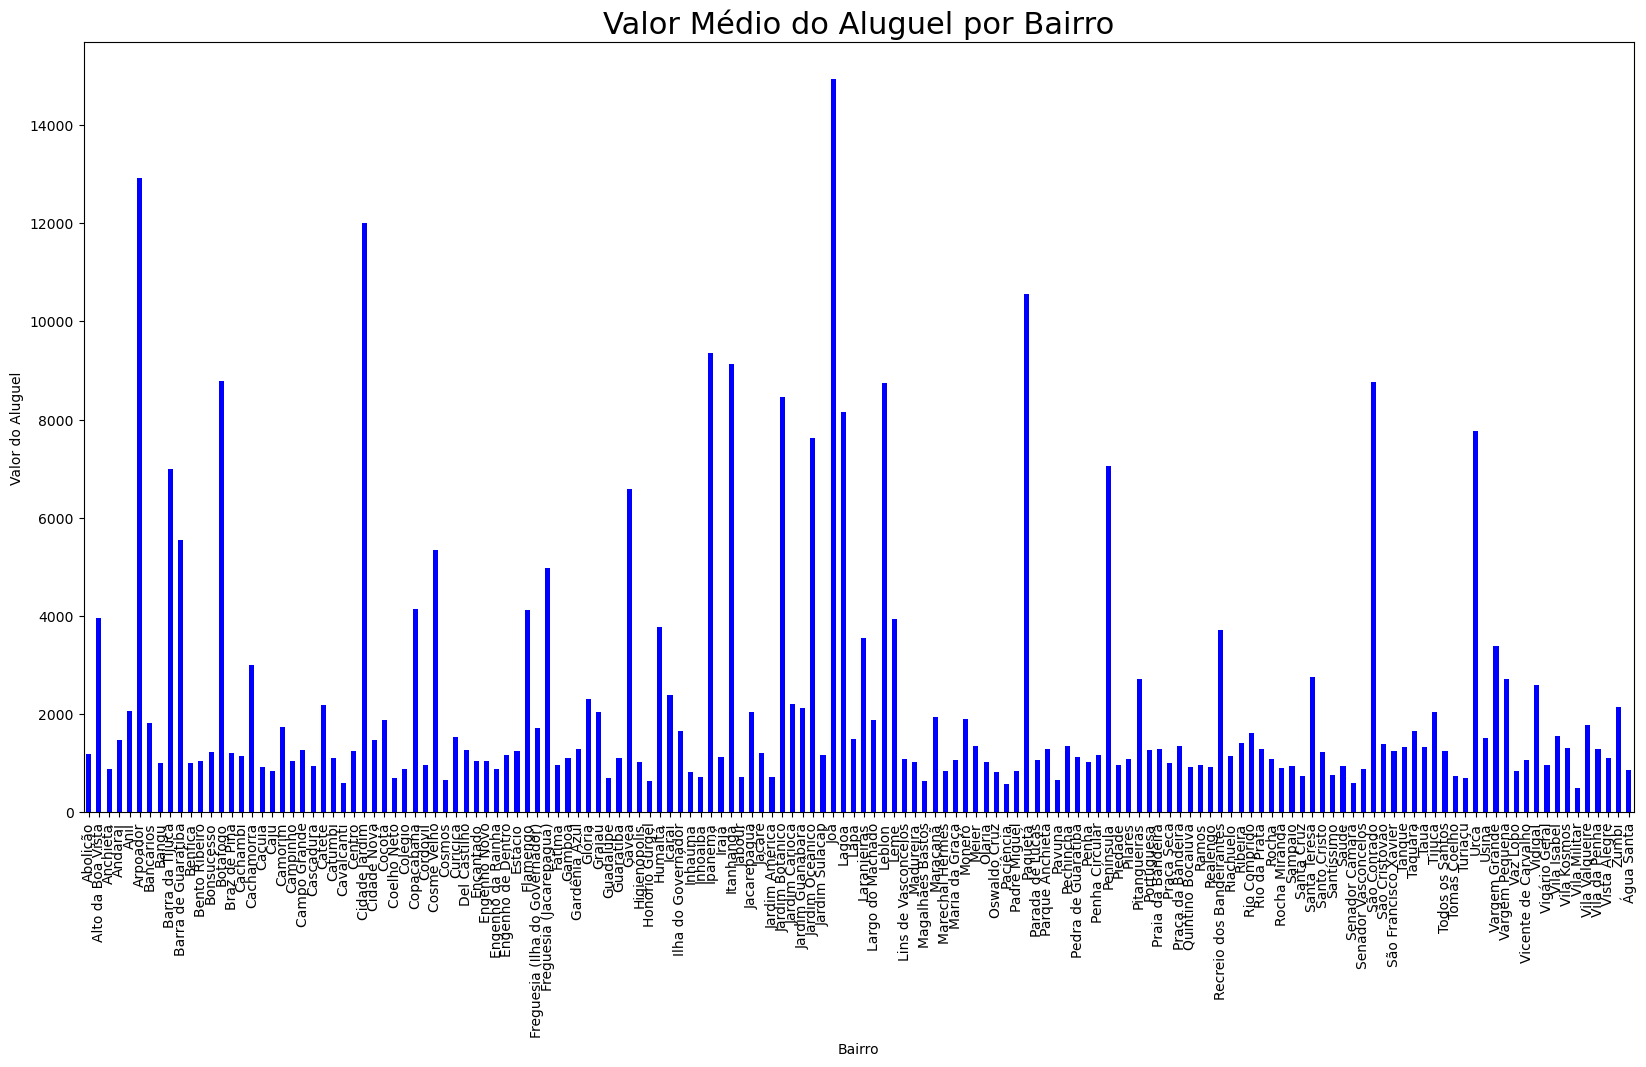

In [740]:
# Gráfico do Valor Médio do Aluguel por Bairro
fig = grupo_bairro['Aluguel'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Máximo do Aluguel por Bairro')

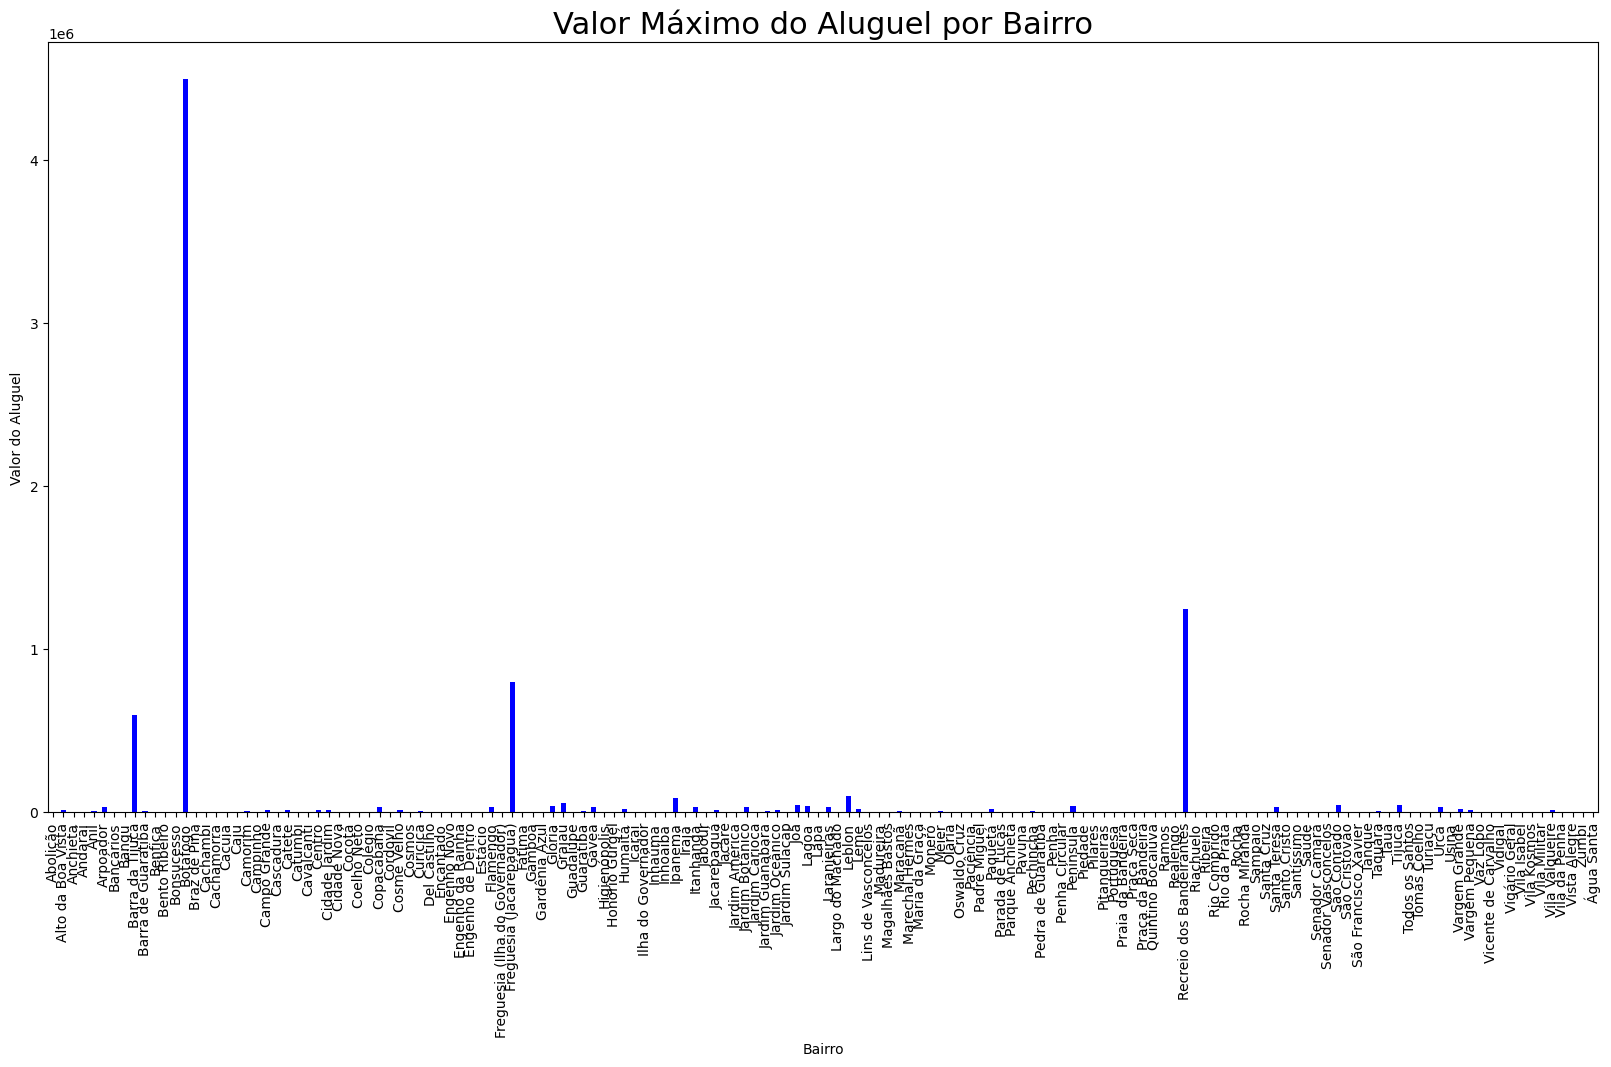

In [741]:
# Gráfico do Valor Máximo do Aluguel por Bairro
fig = grupo_bairro['Aluguel'].max().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Máximo do Aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Desvio Padrão do Aluguel por Bairro')

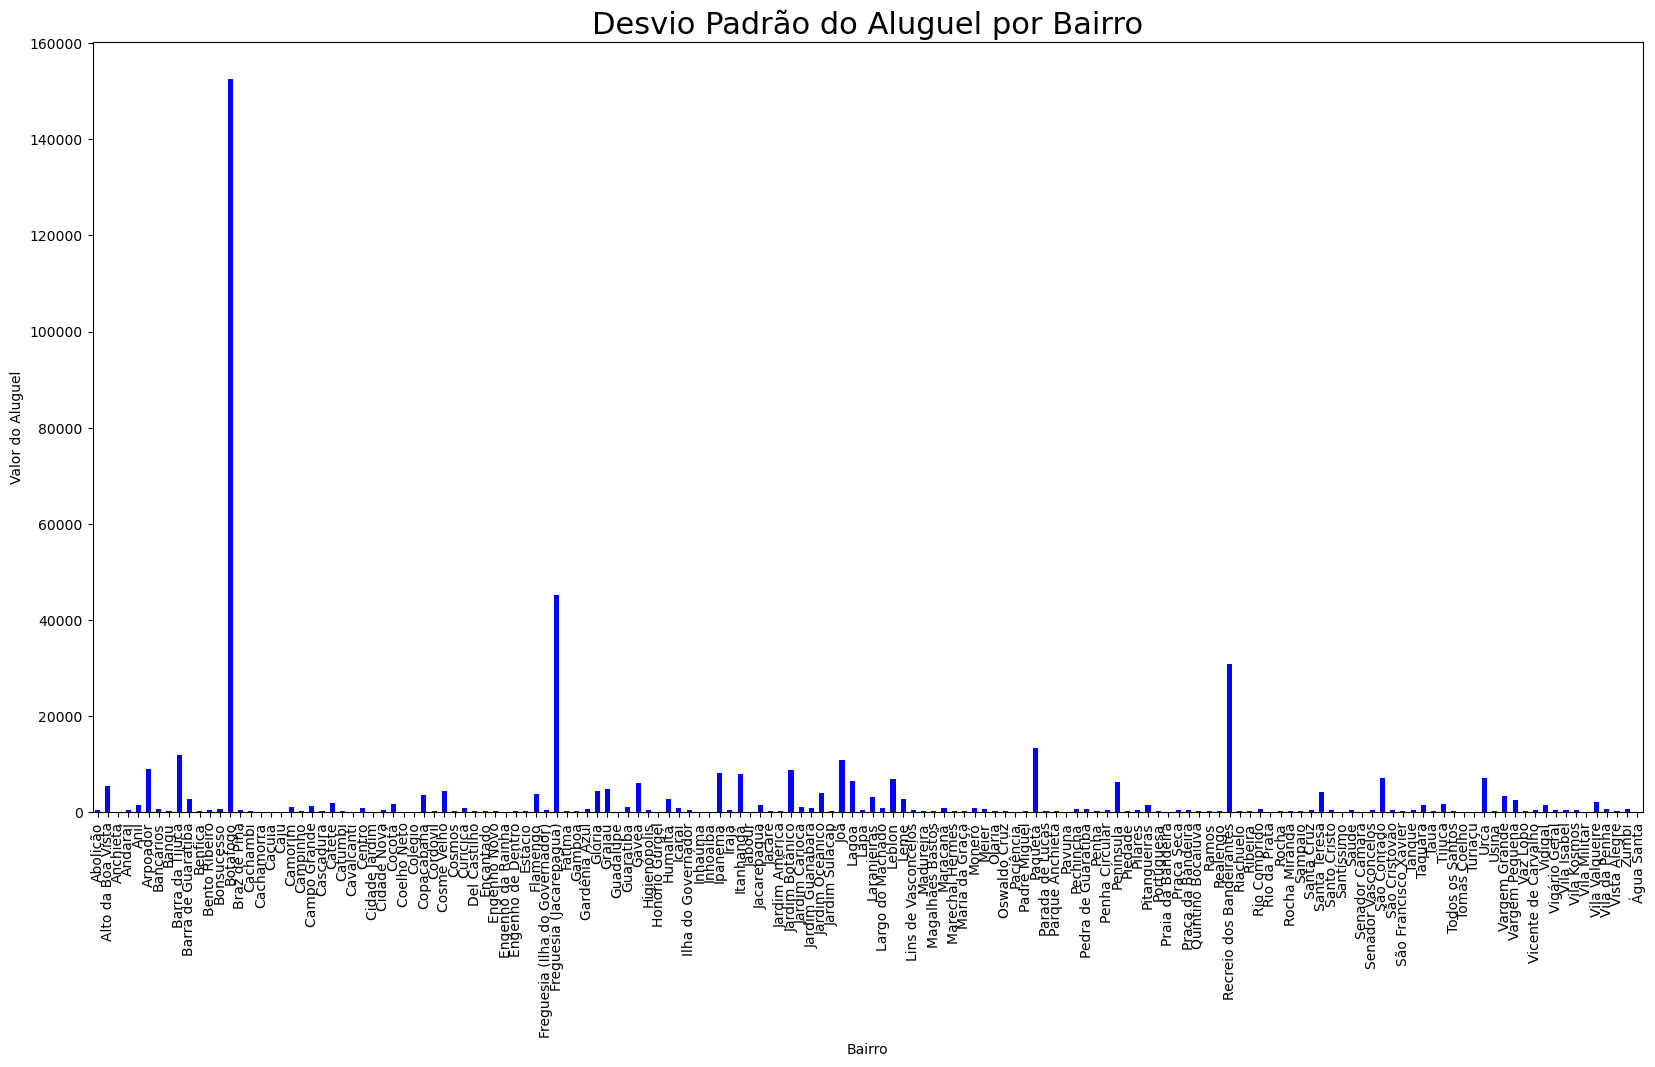

In [742]:
# Gráfico do Desvio Padrão do Aluguel por Bairro
fig = grupo_bairro['Aluguel'].std().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Desvio Padrão do Aluguel por Bairro', {'fontsize': 22})

#### 2.4.2.2 Valor Bruto

In [743]:
grupo_bairro['Valor Bruto'].aggregate([
    'count', 'mean', 'std', 'median', 'min', 'max', 'sum'
    ]).round(2).rename(columns = {
    'count': 'Frequência',
    'mean': 'Média',
    'std': 'Desvio Padrão',
    'median': 'Mediana',
    'min': 'Mínimo', 
    'max': 'Máximo',
    'sum': 'Soma'
    }).sort_values(by='Média', ascending = True)

,Frequência,Média,Desvio Padrão,Mediana,Mínimo,Máximo,Soma
Bairro,,,,,,,
Vila Militar,2,500.00,0.00,500.0,500.0,500.0,1000.0
Senador Camará,1,600.00,NaN,600.0,600.0,600.0,600.0
Paciência,8,666.25,78.18,650.0,600.0,830.0,5330.0
Cavalcanti,2,723.00,173.95,723.0,600.0,846.0,1446.0
Jardim América,7,728.57,251.42,800.0,400.0,1100.0,5100.0
...,...,...,...,...,...,...,...
São Conrado,257,11734.20,8974.33,8300.0,1945.0,47650.0,3015689.0
Lins de Vasconcelos,47,12588.77,75653.77,1500.0,860.0,520200.0,591672.0
Cidade Jardim,1,13700.00,NaN,13700.0,13700.0,13700.0,13700.0


Text(0.5, 1.0, 'Valor Médio do Valor Bruto por Bairro')

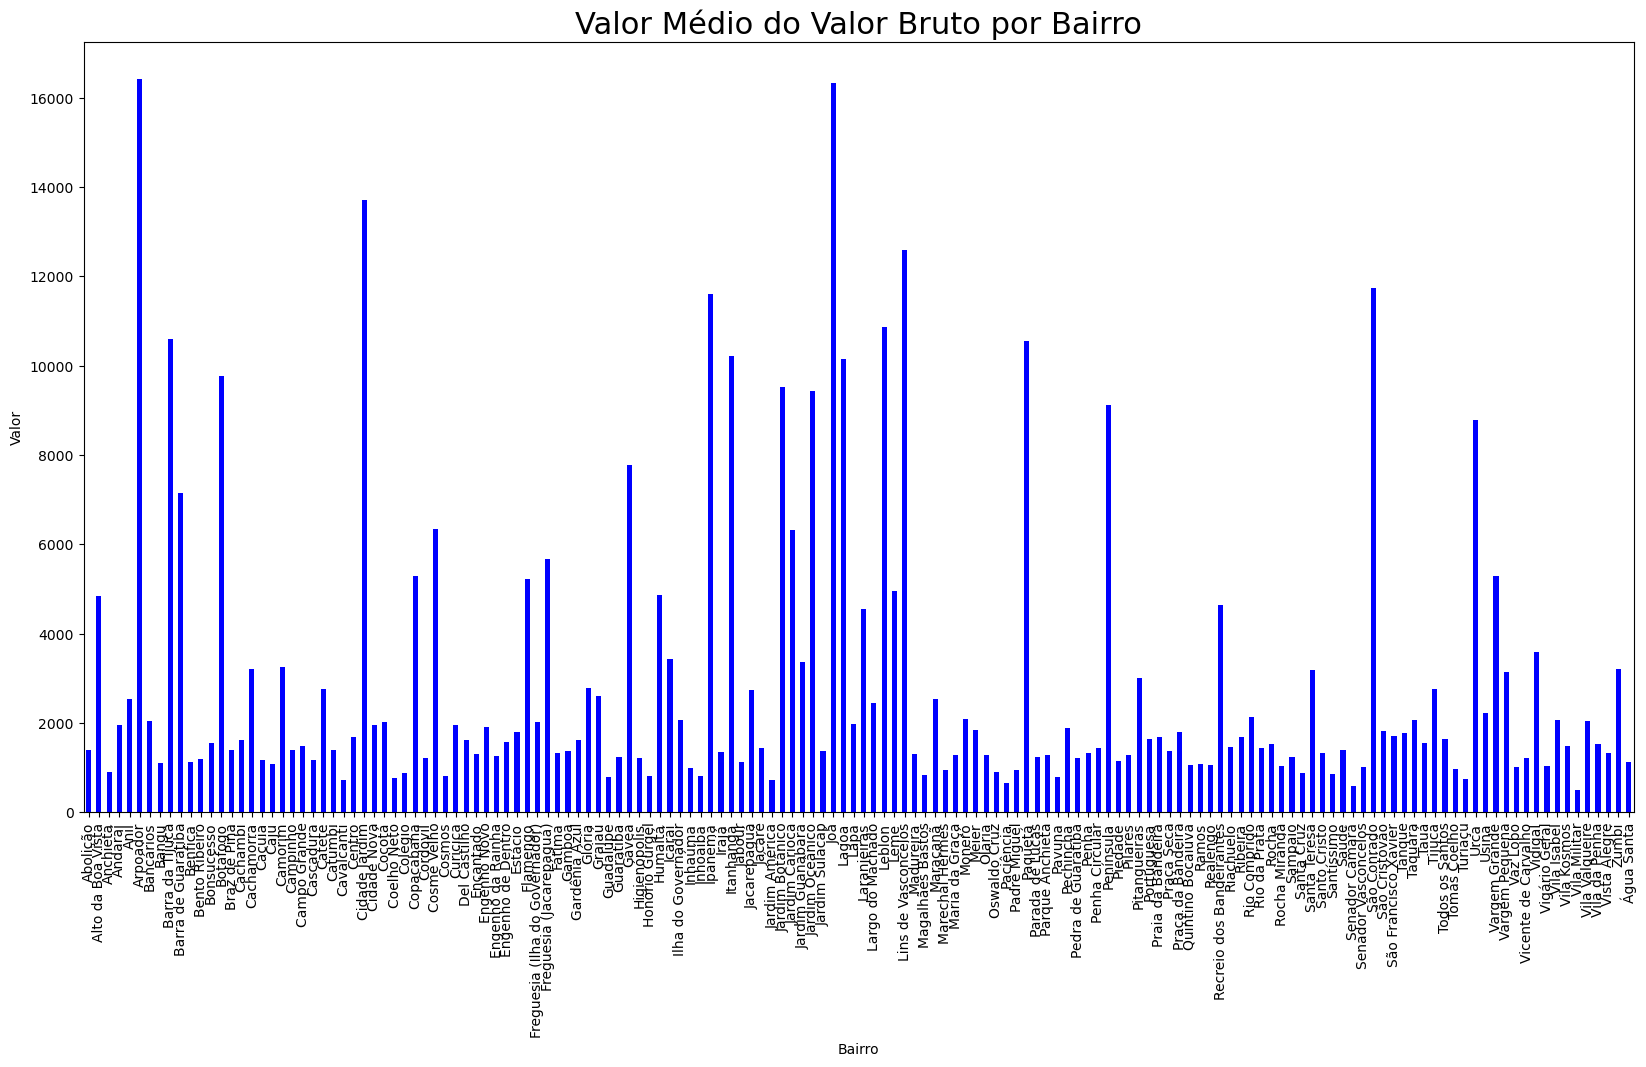

In [744]:
# Eu fiz um "for" para tentar imprimir os gráficos com uma mesma linha de comando,
# mas do jeito que eu fiz só imprime o último. Se usar o método de juntar vários 
# gráficos em uma mesma imagem imagino que fique ruim de visualizar, nesse caso.


# for valor_estatistico in ['Valor Médio', 'Valor Máximo', 'Desvio Padrão']:
#    if valor_estatistico == 'Valor Médio':
#        fig = grupo_bairro['Valor Bruto'].mean().plot.bar(color = 'blue')
#    elif valor_estatistico == 'Valor Máximo':
#        fig = grupo_bairro['Valor Bruto'].max().plot.bar(color = 'blue')
#    else:
#        fig = grupo_bairro['Valor Bruto'].std().plot.bar(color = 'blue')
        
#    fig.set_ylabel('Valor Bruto')
#    fig.set_title(valor_estatistico + ' do Aluguel por Bairro', {'fontsize': 22})


# Usamos o mesmo método da subseção passada.
# Gráfico do Valor Médio do Aluguel por Bairro:
fig = grupo_bairro['Valor Bruto'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor')
fig.set_title('Valor Médio do Valor Bruto por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Máximo do Valor Bruto por Bairro')

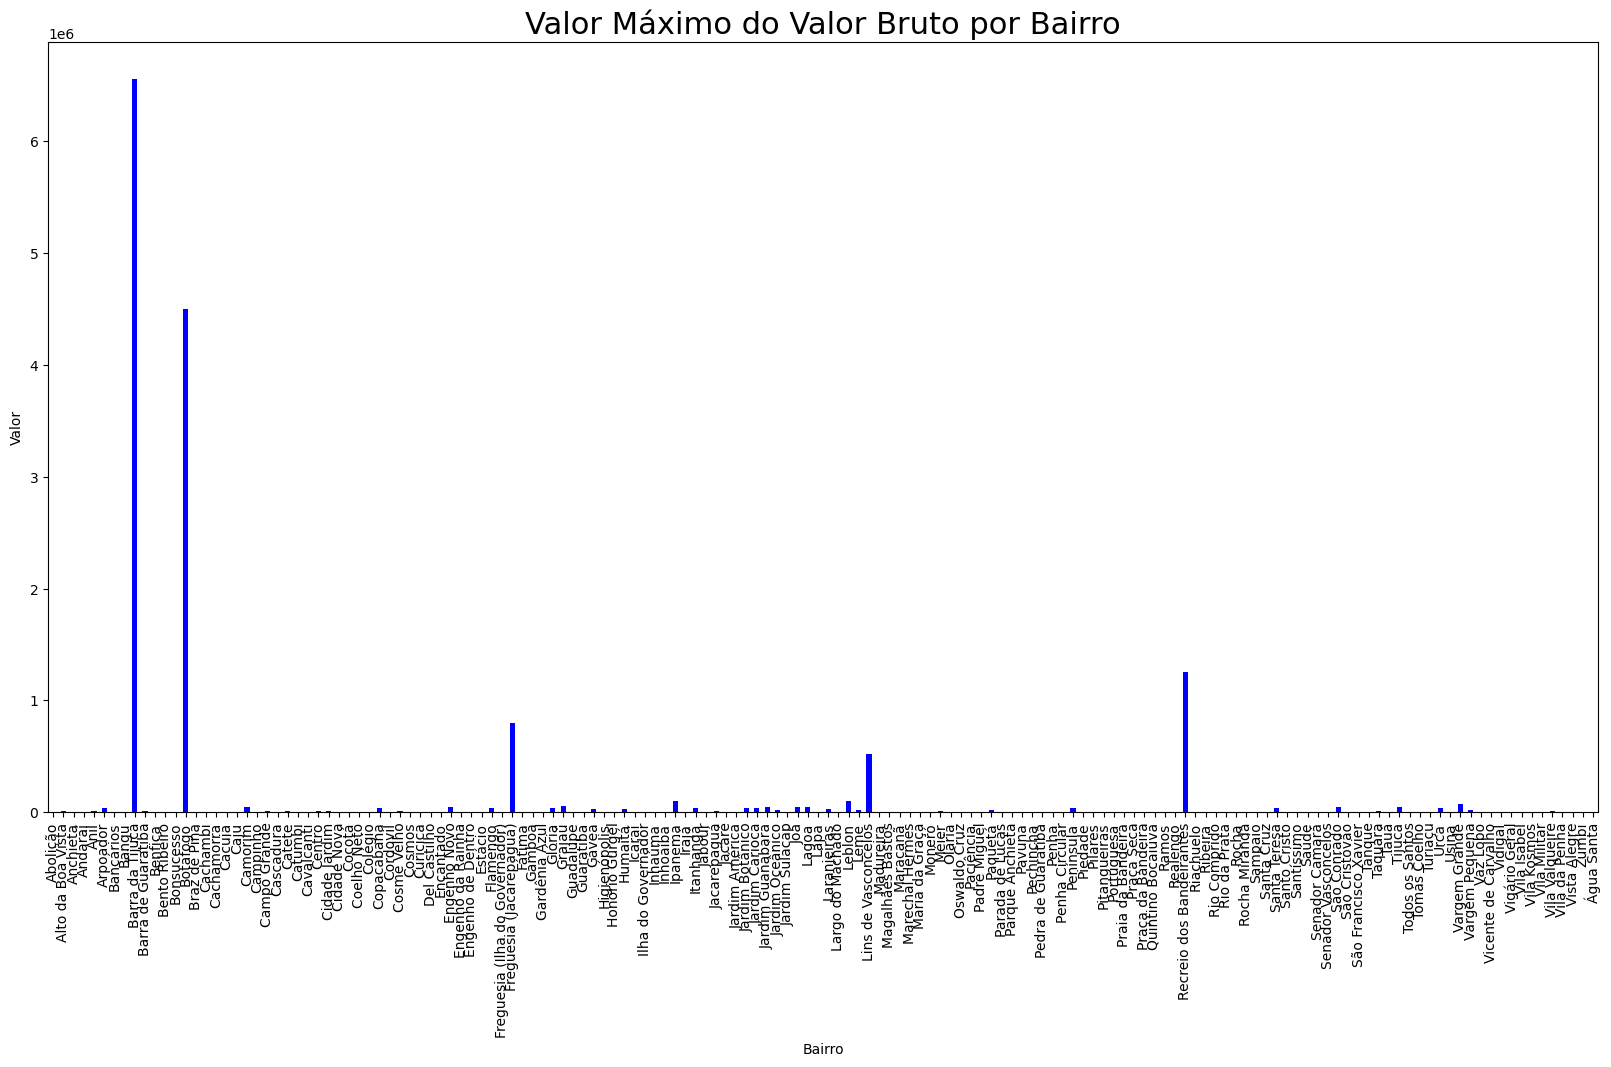

In [745]:
# Gráfico do Valor Máximo do Aluguel por Bairro
fig = grupo_bairro['Valor Bruto'].max().plot.bar(color = 'blue')
fig.set_ylabel('Valor')
fig.set_title('Valor Máximo do Valor Bruto por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Desvio Padrão do Valor Bruto por Bairro')

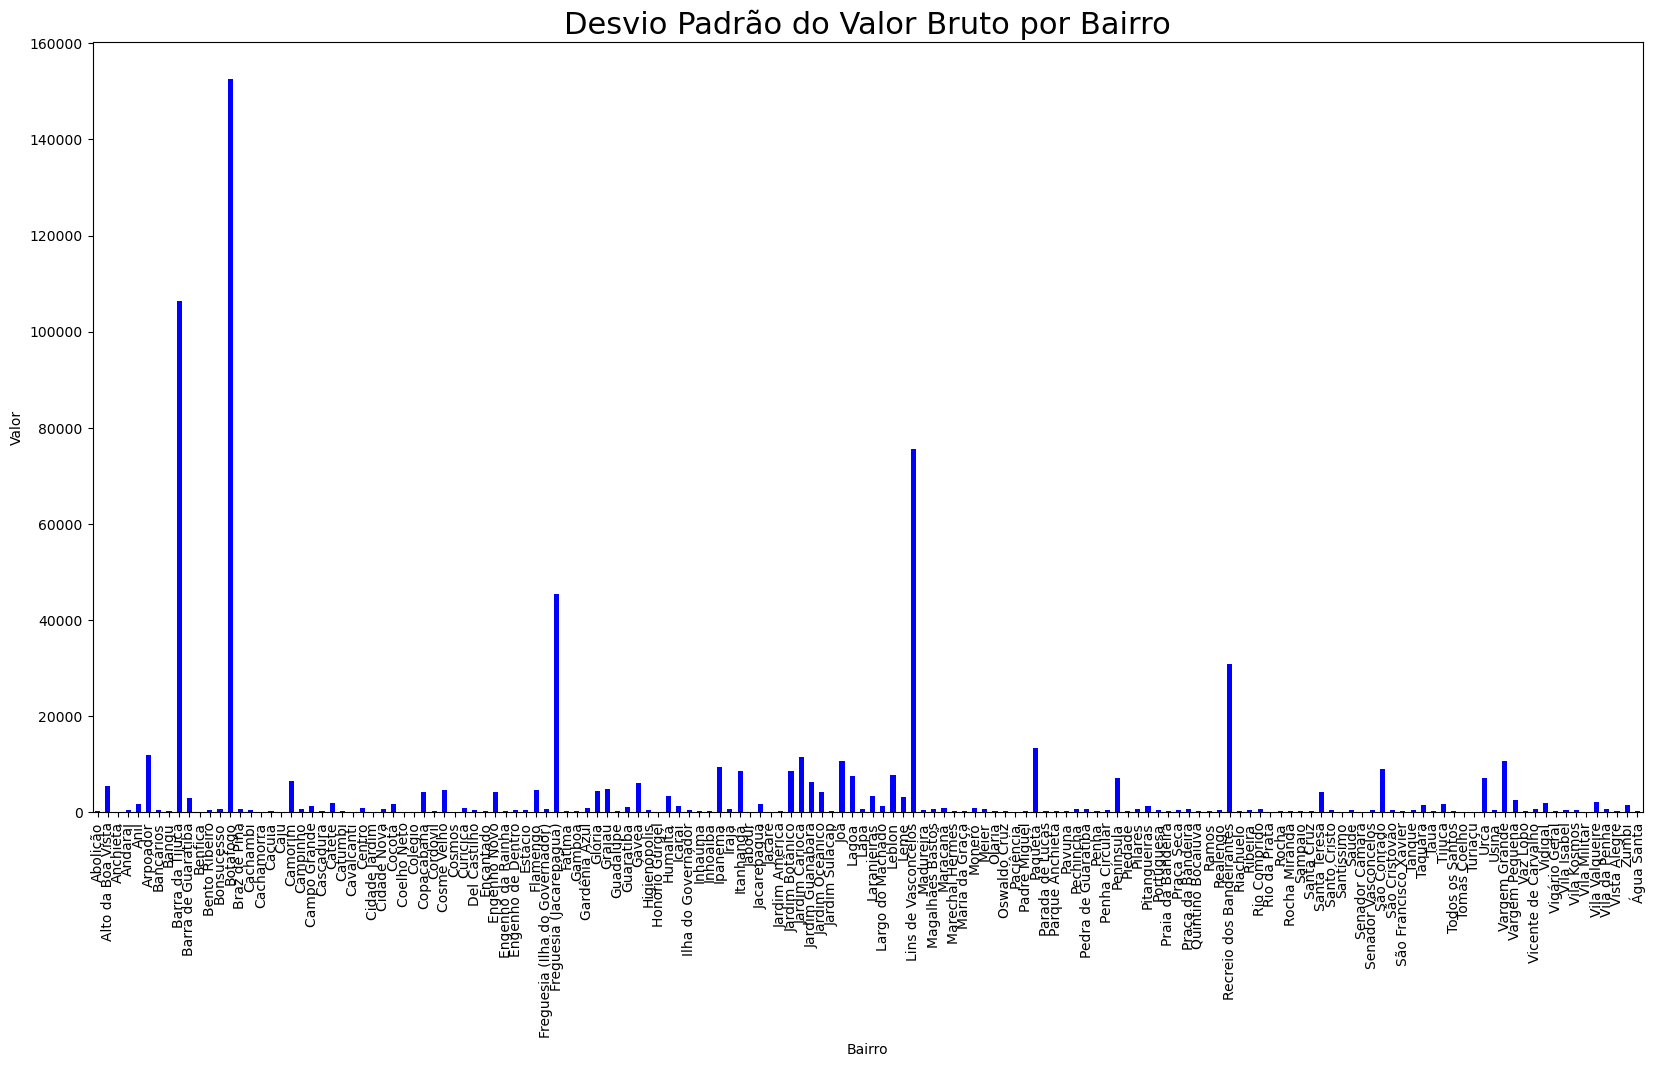

In [746]:
# Gráfico do Desvio Padrão do Aluguel por Bairro
fig = grupo_bairro['Valor Bruto'].std().plot.bar(color = 'blue')
fig.set_ylabel('Valor')
fig.set_title('Desvio Padrão do Valor Bruto por Bairro', {'fontsize': 22})

#### 2.4.3 Removendo os outliers

Observando os gráficos da subseção anterior, vemos que alguns valores de aluguel que são muito altos, existe, por exemplo, um apartamento no Botafogo com 4,5 milhões de aluguel. Há uma possibilidade de haver alguns dados com o preço do imóvel, não com o aluguel.

Para remover esses e outros outliers, vamos usar o Box Plot esquematizado na imagem abaixo. 

<img src="Box-Plot.png" width=35%>

- Q1: Valor referente ao primeiro quartil (25%).
- Q3: Valor referente ao terceiro quartil (75%).
- IIQ: Intervalo interquartílico, a variação entre o primeiro e o terceito quartil.
- Limite inferior: representado pela expressão Q1 - 1.5 $\times$ IIQ, uma métrica para saber quais valores inferiores estão muito discrepantes com relação aos outros.
- Limite superior: representado pela expressão Q3 + 1.5 $\times$ IIQ, para retirar os valores superiores muito discrepantes.

Inicialmente, aplicamos a análise do Box Plot para todos os imóveis residenciais juntos, mas não é a melhor maneira de analisar. Por exemplo, as Casas de Condomínio costumam ter valores maiores de aluguel, em comparação com as Quitinetes ou Apartamentos, então pode acontecer de serem retirados muitos desses valores como outliers, mesmo que sejam dados que representem bem o conjunto das Casas de Condomínio. Por isso, faremos também a análise por tipo de apartamento, para buscar melhores resultados.

In [747]:
# As residências com mais de R$100.000,00 de aluguel, exemplos de outliers.
dados_residenciais[dados_residenciais['Aluguel'] > 100000]

,Tipo,Bairro,Area,Aluguel,Condominio,Valor Bruto,Valor / m^2
7575,Apartamento,Barra da Tijuca,65,600000.0,980.0,600980.0,9245.8
10565,Casa de Condomínio,Freguesia (Jacarepaguá),163,800000.0,900.0,800900.0,4913.5
12576,Apartamento,Freguesia (Jacarepaguá),150,550000.0,850.0,550850.0,3672.3
13749,Apartamento,Recreio dos Bandeirantes,167,1250000.0,1186.0,1251186.0,7492.1
15413,Apartamento,Botafogo,300,4500000.0,1100.0,4501100.0,15003.7
21249,Apartamento,Barra da Tijuca,403,160000.0,3714.0,163714.0,406.2


In [748]:
# Há uma residência com R$100,00 de aluguel, outro exemplo de outliers.
dados_residenciais[dados_residenciais['Aluguel'] <= 100]

,Tipo,Bairro,Area,Aluguel,Condominio,Valor Bruto,Valor / m^2
14238,Apartamento,Leblon,15,100.0,1.0,101.0,6.7


##### 2.4.3.1 Para todos os imóveis residenciais juntos

Primeiramente, vamos fazer o Box Plot com todos os dados, sem retirar os pontos destoantes. Após retirar esses pontos, fazemos novamente um Box Plot. Entretanto, após retirar os outliers, os dados são atualizados e ficam diferentes. Por conta disso, alguns dados podem se tornar o outliers, sendo necesssário realizar o processo novamente.

<AxesSubplot: >

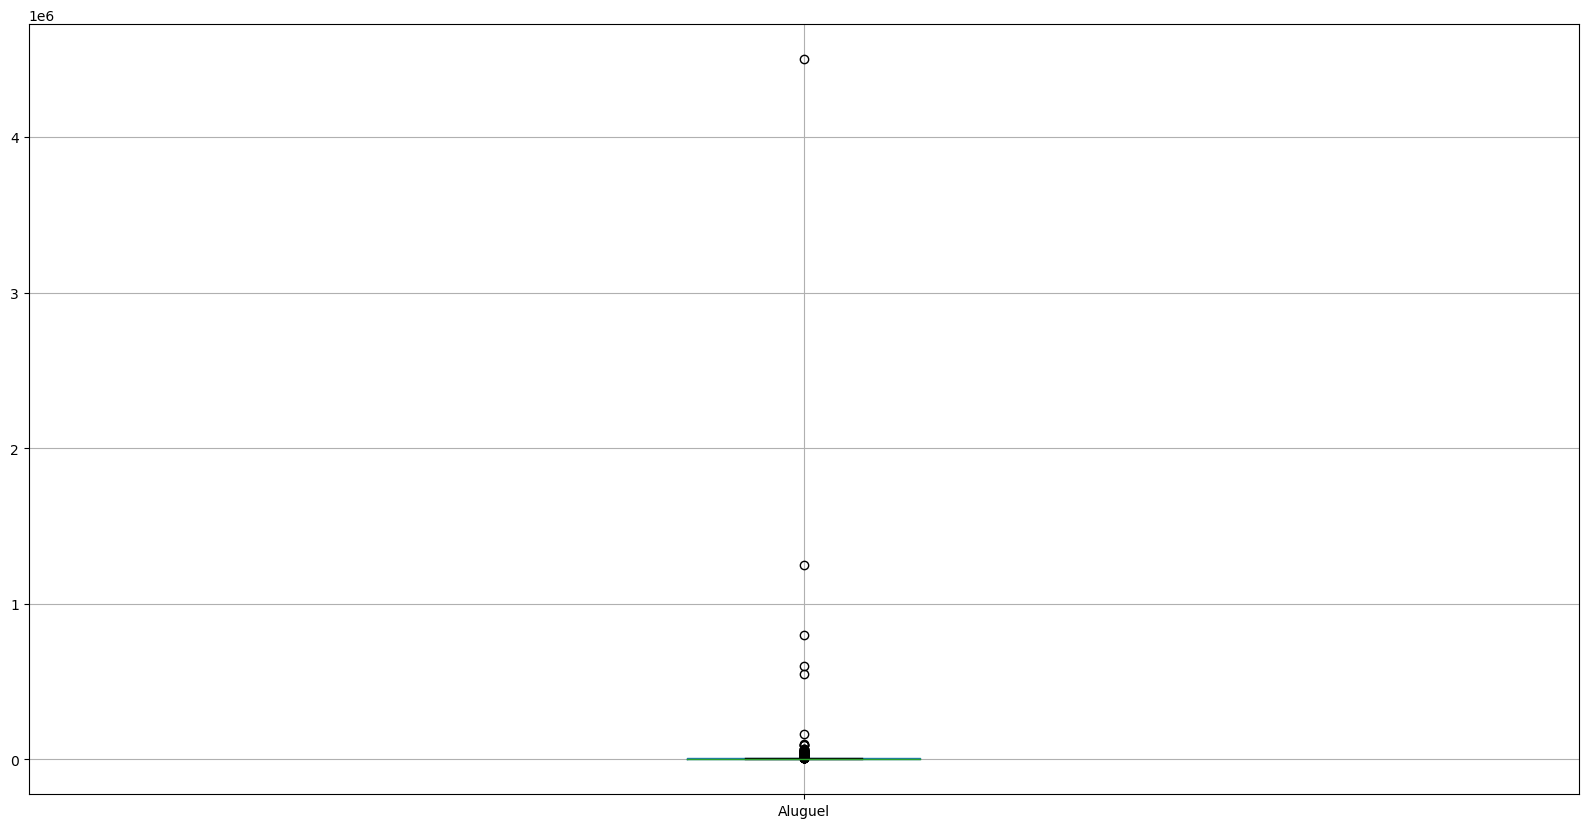

In [749]:
dados_residenciais.boxplot(['Aluguel'])
# Esse Box Plot não ficou simiar ao que é visualizado na representação inicial 
# pois ainda está com os outliers, alguns dos valores muito destoantes.

array([[<AxesSubplot: title={'center': 'Aluguel'}>]], dtype=object)

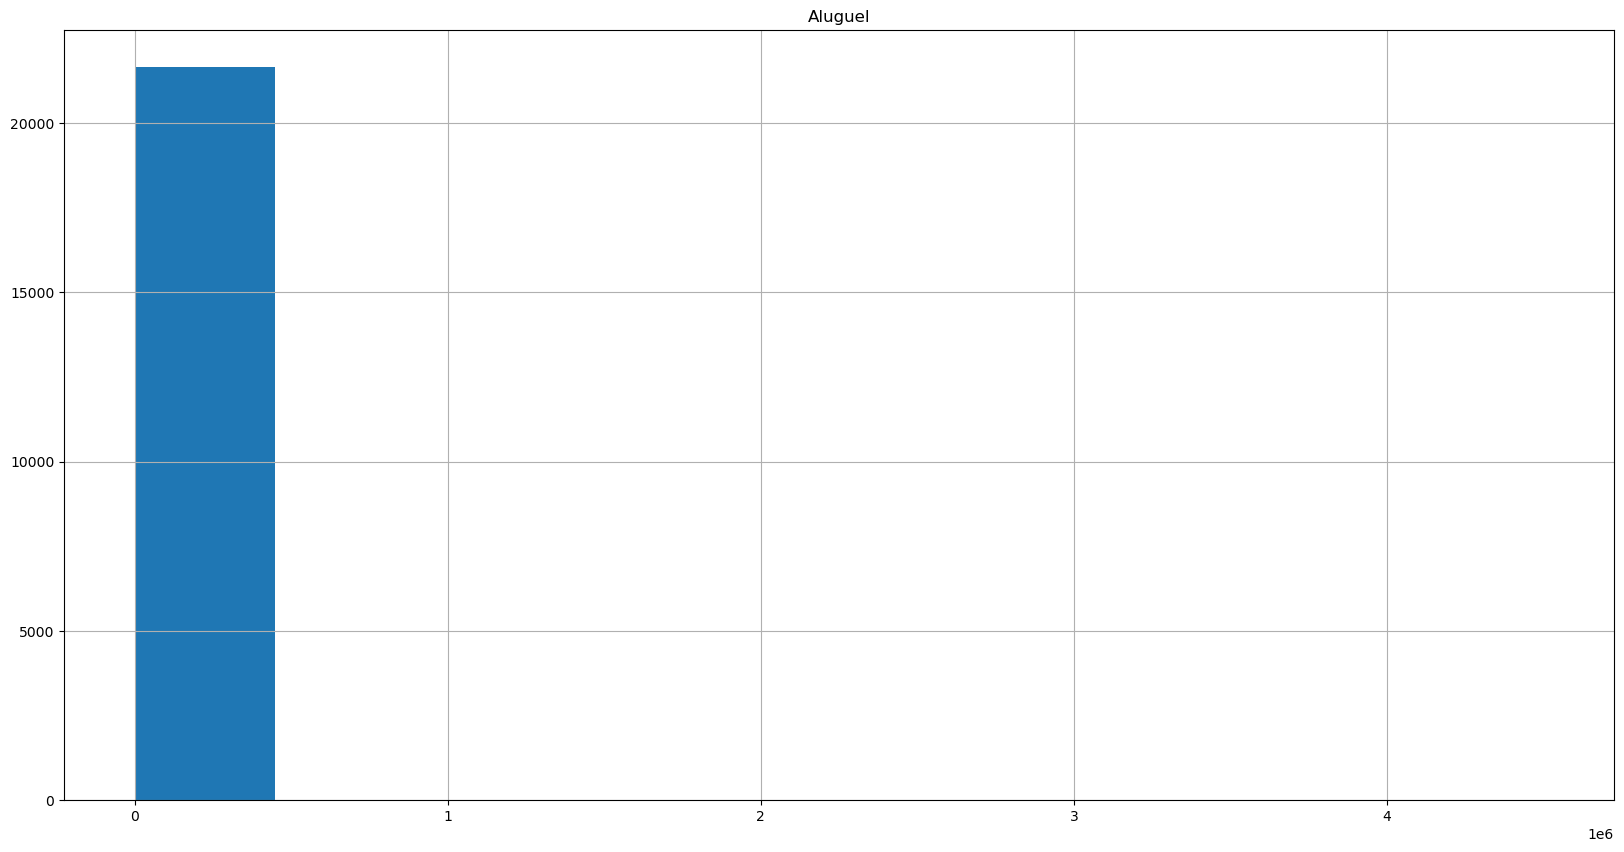

In [750]:
dados_residenciais.hist(['Aluguel'])
# Só tem uma coluna, o que indica que os dados não estão bem distribuidos.
# Se retirar os outliers já deve melhorar a aparência.

In [751]:
aluguel = dados_residenciais['Aluguel']
aluguel

0        1700.0
1        7000.0
2         800.0
3         800.0
4        1300.0
          ...  
21662     900.0
21663     800.0
21664    1800.0
21665    1400.0
21666    3000.0
Name: Aluguel, Length: 21667, dtype: float64

In [752]:
Q1 = aluguel.quantile(.25)
Q3 = aluguel.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [753]:
# Seleção para excluir os outliers.
selecao = ((aluguel >= limite_inferior) & (aluguel <= limite_superior))
selecao

0        True
1        True
2        True
3        True
4        True
         ... 
21662    True
21663    True
21664    True
21665    True
21666    True
Name: Aluguel, Length: 21667, dtype: bool

In [754]:
# Retirando os outliers.
dados_residenciais_boxplot = dados_residenciais[selecao]
adj_index(dados_residenciais_boxplot)
dados_residenciais_boxplot

,Tipo,Bairro,Area,Aluguel,Condominio,Valor Bruto,Valor / m^2
0,Quitinete,Copacabana,40,1700.0,500.0,2200.0,55.0
1,Casa,Jardim Botânico,100,7000.0,0.0,7000.0,70.0
2,Apartamento,Centro,15,800.0,390.0,1190.0,79.3
3,Apartamento,Higienópolis,48,800.0,230.0,1030.0,21.5
4,Apartamento,Cachambi,50,1300.0,301.0,1601.0,32.0
...,...,...,...,...,...,...,...
19682,Apartamento,Méier,70,900.0,490.0,1390.0,19.9
19683,Quitinete,Centro,27,800.0,350.0,1150.0,42.6
19684,Apartamento,Jacarepaguá,78,1800.0,800.0,2600.0,33.3
19685,Apartamento,São Francisco Xavier,48,1400.0,509.0,1909.0,39.8


In [755]:
# Verificando quais dados foram retirados.
dados_retirados = dados_residenciais[~selecao]
adj_index(dados_retirados)
dados_retirados

,Tipo,Bairro,Area,Aluguel,Condominio,Valor Bruto,Valor / m^2
0,Apartamento,Copacabana,243,13000.0,2000.0,15000.0,61.7
1,Casa,Campo Grande,400,12000.0,0.0,12000.0,30.0
2,Casa de Condomínio,Barra da Tijuca,1600,25000.0,1600.0,26600.0,16.6
3,Apartamento,Península,267,18000.0,3100.0,21100.0,79.0
4,Casa,São Conrado,730,28000.0,2000.0,30000.0,41.1
...,...,...,...,...,...,...,...
1975,Apartamento,Leblon,200,16000.0,4200.0,20200.0,101.0
1976,Apartamento,Lagoa,225,12000.0,3756.0,15756.0,70.0
1977,Casa de Condomínio,Barra da Tijuca,1000,20000.0,3000.0,23000.0,23.0
1978,Apartamento,Ipanema,150,15000.0,1400.0,16400.0,109.3


In [756]:
def boxplot_function(Dataframe1):
    #----------------Definindo os limites para o Box Plot------------------#
    aluguel = Dataframe1['Aluguel']
    Q1 = aluguel.quantile(.25)
    Q3 = aluguel.quantile(.75)
    IIQ = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IIQ
    limite_superior = Q3 + 1.5 * IIQ
    #----Retirando os outliers e organizando os dados para o Box Plot-----#
    selecao = ((aluguel >= limite_inferior) & (aluguel <= limite_superior))
    Dataframe2 = Dataframe1[selecao]
    adj_index(Dataframe2)
    Dataframe2.boxplot(['Aluguel'])
    return Dataframe2

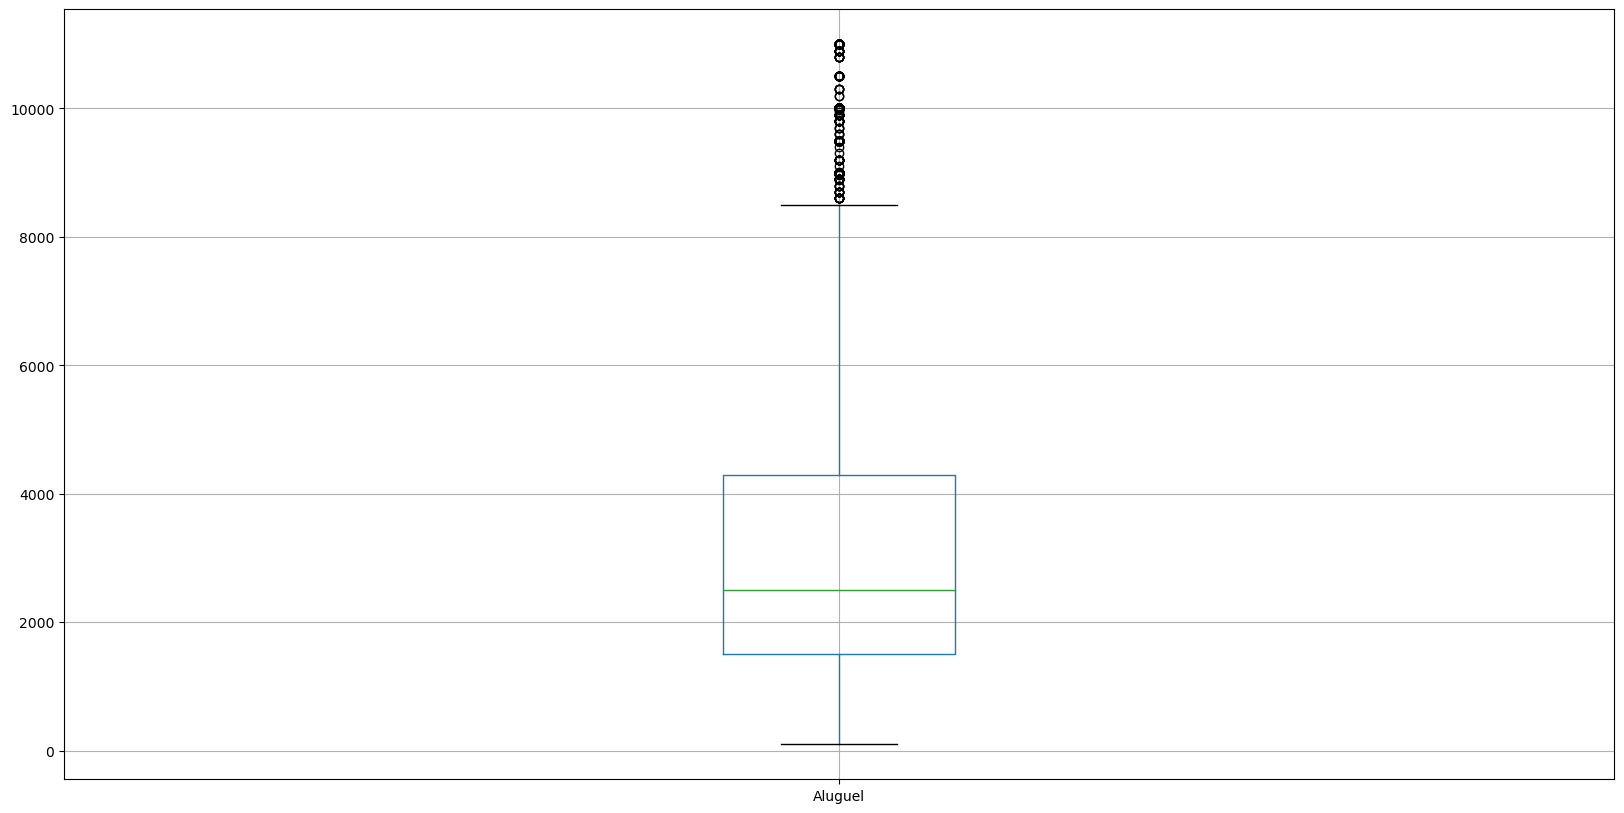

In [757]:
dados_residenciais_boxplot1 = boxplot_function(dados_residenciais)

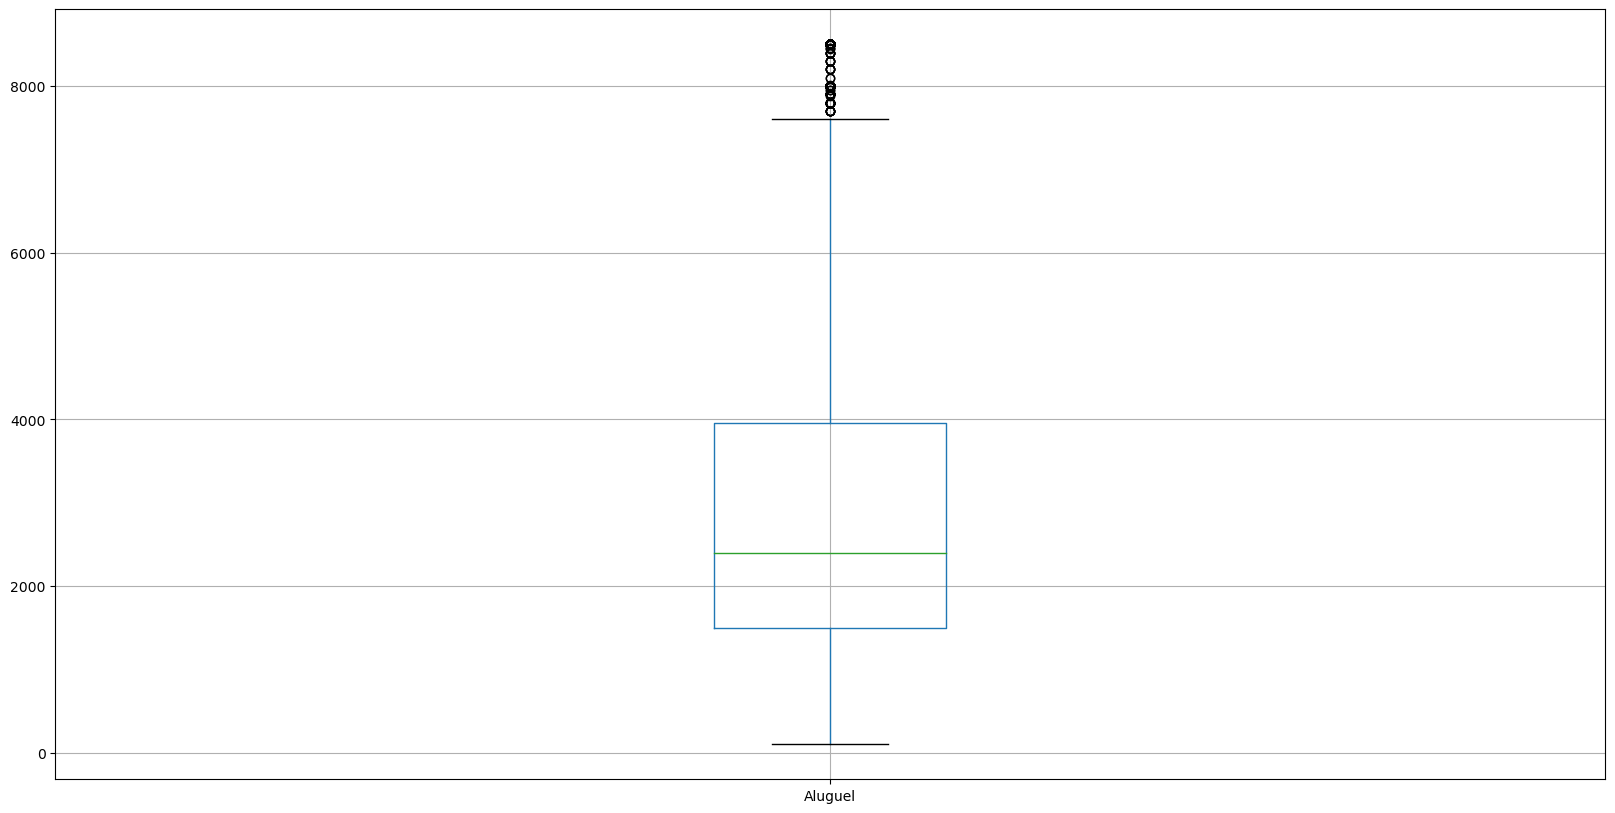

In [758]:
dados_residenciais_boxplot2 = boxplot_function(dados_residenciais_boxplot1)

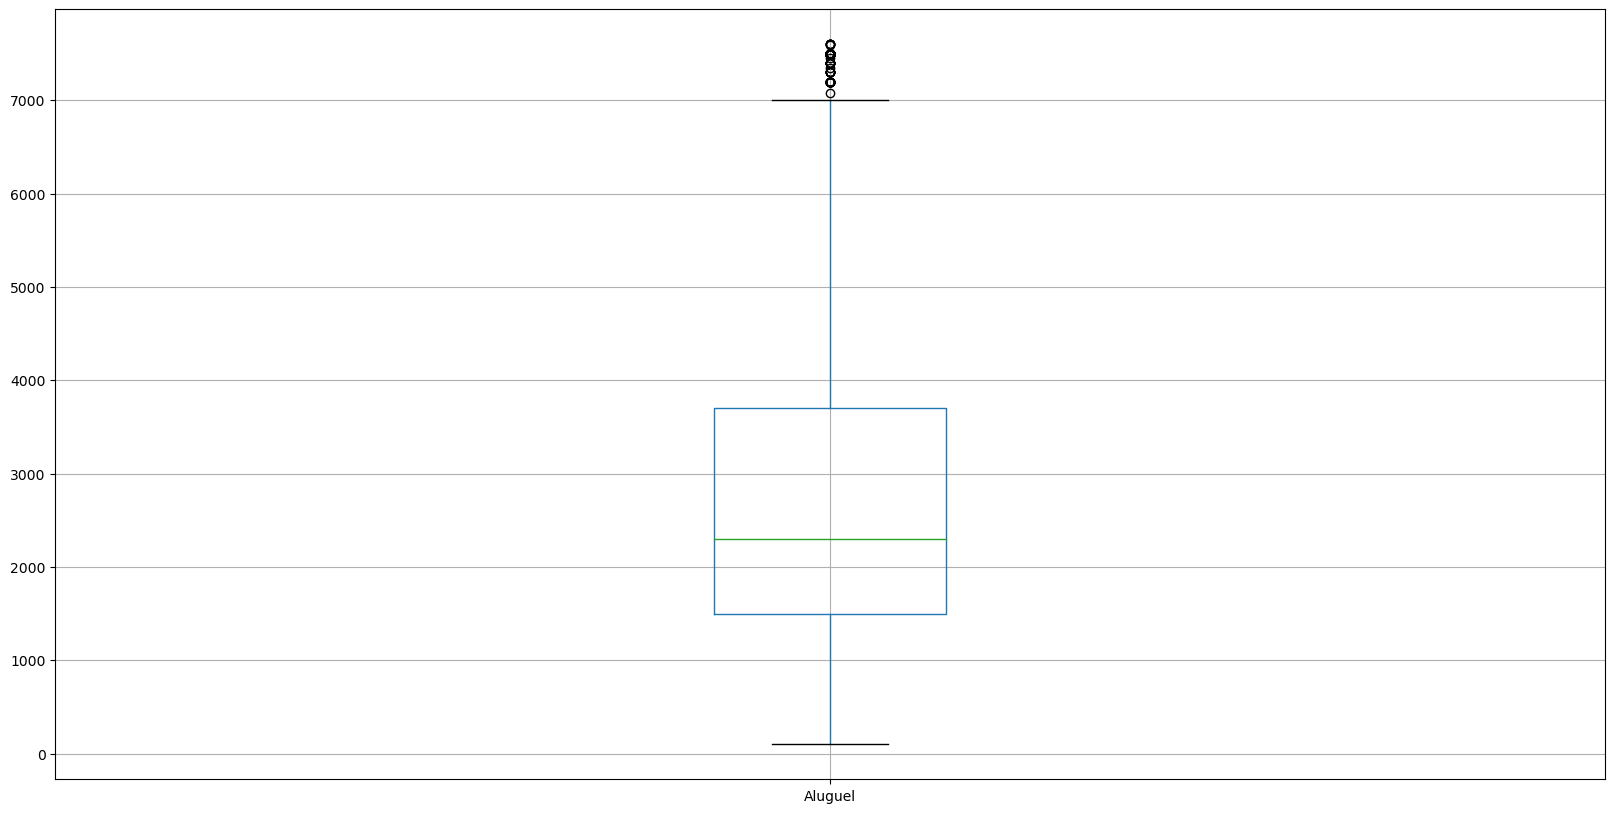

In [759]:
dados_residenciais_boxplot3 = boxplot_function(dados_residenciais_boxplot2)

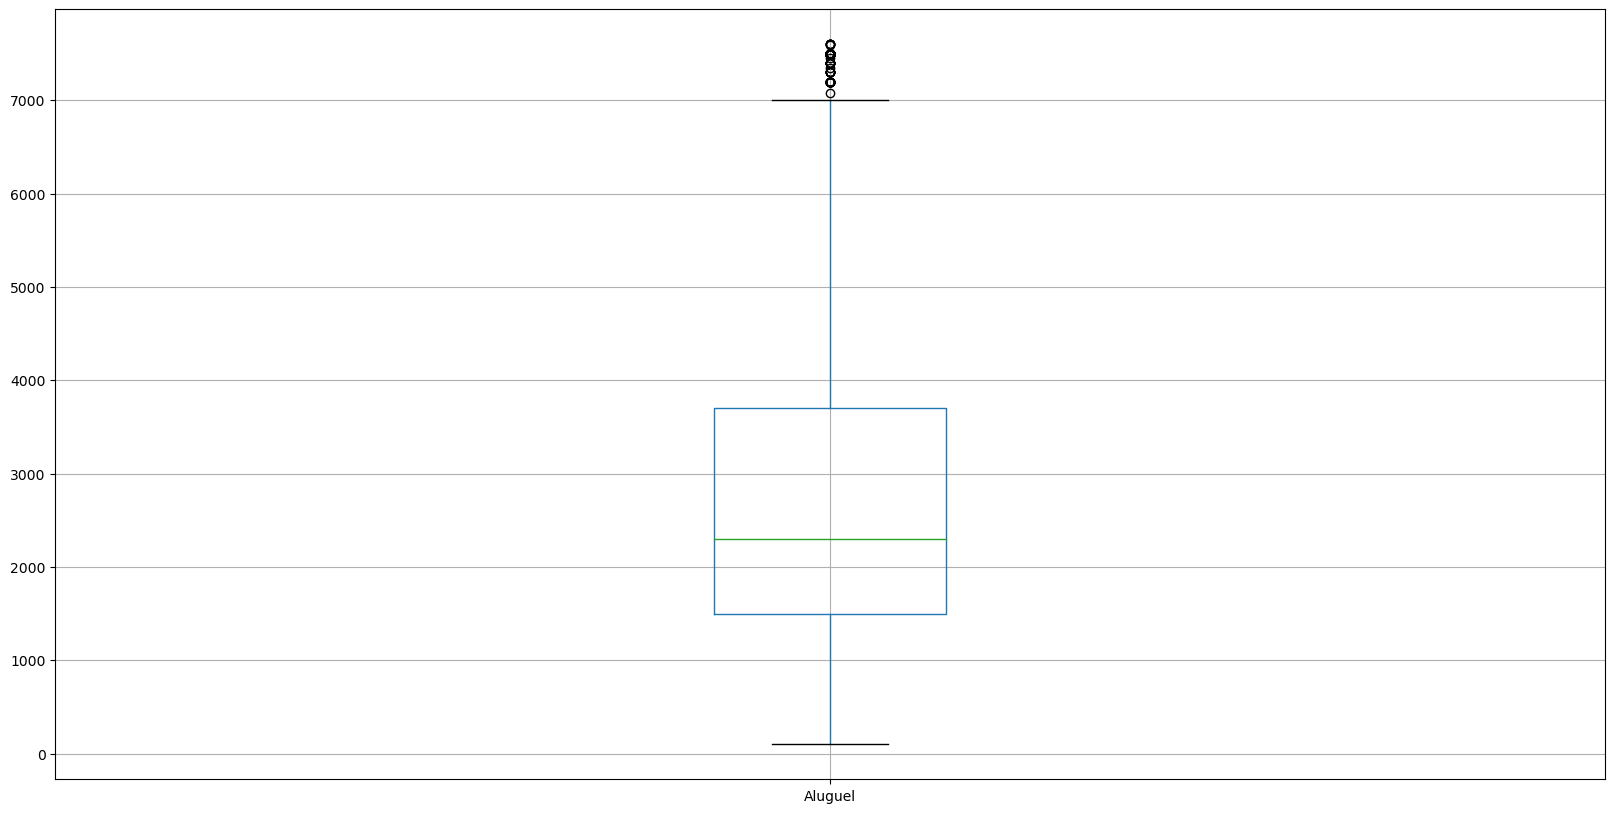

In [760]:
dados_residenciais_boxplot3 = boxplot_function(dados_residenciais_boxplot2)

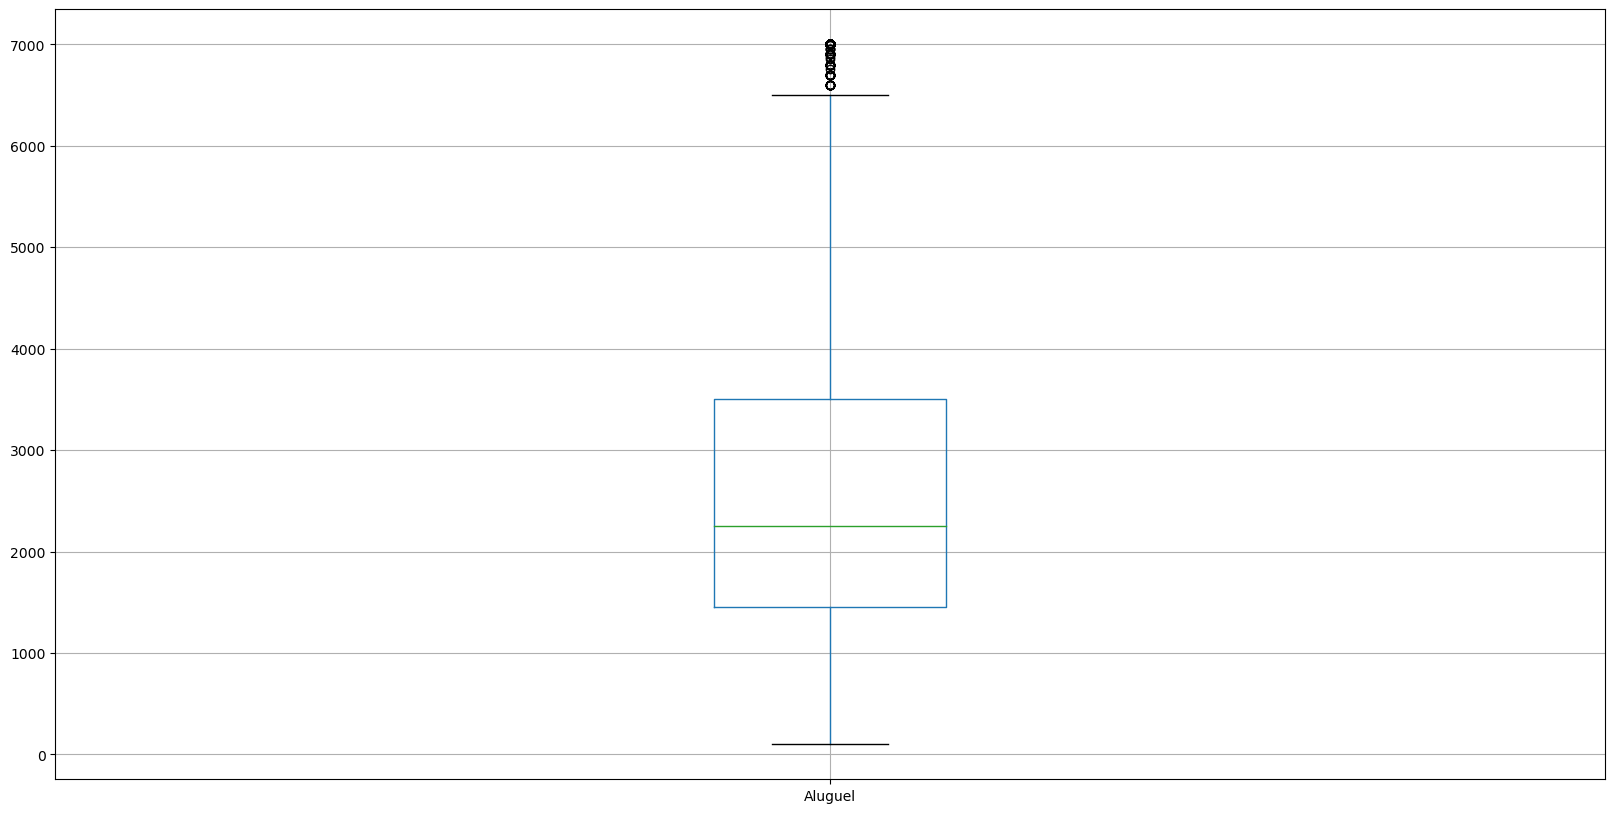

In [761]:
dados_residenciais_boxplot4 = boxplot_function(dados_residenciais_boxplot3)

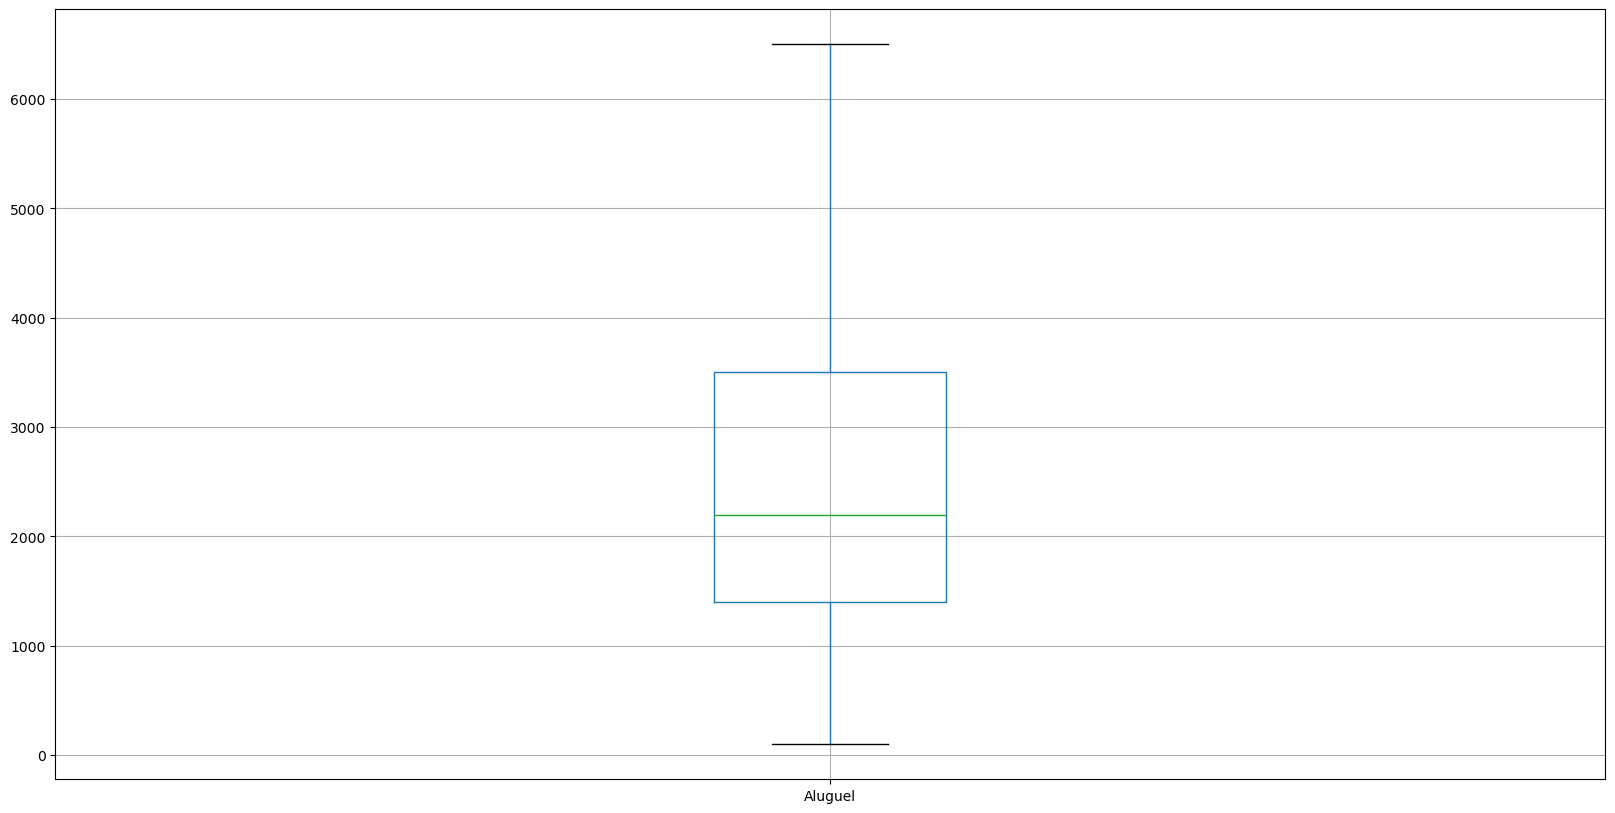

In [762]:
dados_residenciais_boxplot5 = boxplot_function(dados_residenciais_boxplot4)

In [763]:
print(f'Usando o Box Plot para todos os dados juntos, foram excluídos {dados_residenciais.shape[0]-dados_residenciais_boxplot5.shape[0]} imóveis na forma de outliers. Diminuição equivalente à, \n aproximadamente, {100*(1-dados_residenciais_boxplot5.shape[0]/dados_residenciais.shape[0]):,.0f}%.')

# Definindo a função que imprime a quantidade de dados
# tirados como outliers e qual a porcentagem que ele representa.
def quantidade_excluidos(tipo_imovel):
    if tipo_imovel in residencial:
        selecao1 = dados_residenciais['Tipo'] == "{}".format(tipo_imovel)
        selecao2 = dados_residenciais_boxplot5['Tipo'] == "{}".format(tipo_imovel)
        if dados_residenciais[selecao1].shape[0] != 0:
            print(f'-Foram {dados_residenciais[selecao1].shape[0]-dados_residenciais_boxplot5[selecao2].shape[0]} imóveis do tipo "{tipo_imovel}". Diminuição equivalente à, aproximadamente, {100*(1-dados_residenciais_boxplot5[selecao2].shape[0]/dados_residenciais[selecao1].shape[0]):,.0f}%.')
        else: 
            print(f'-Foram {dados_residenciais[selecao1].shape[0]-dados_residenciais_boxplot5[selecao2].shape[0]} imóveis do tipo "{tipo_imovel}". Diminuição equivalente à 0%.')
    else:
        print('É necessário que seja um dos elementos da lista:')
        print(residencial)

# Usando a função para todos os imóveis residenciais.
for tipo_imovel in residencial:
    quantidade_excluidos(tipo_imovel)

Usando o Box Plot para todos os dados juntos, foram excluídos 4224 imóveis na forma de outliers. Diminuição equivalente à, 
 aproximadamente, 19%.
-Foram 3336 imóveis do tipo "Apartamento". Diminuição equivalente à, aproximadamente, 18%.
-Foram 310 imóveis do tipo "Casa". Diminuição equivalente à, aproximadamente, 32%.
-Foram 573 imóveis do tipo "Casa de Condomínio". Diminuição equivalente à, aproximadamente, 64%.
-Foram 5 imóveis do tipo "Casa de Vila". Diminuição equivalente à, aproximadamente, 2%.
-Foram 0 imóveis do tipo "Quitinete". Diminuição equivalente à, aproximadamente, 0%.


In [764]:
print(f"Com a retirada dos outliers, há {dados_residenciais_boxplot5['Bairro'].drop_duplicates().shape[0]} bairros.")

bairro_excluido = (set(list(dados_residenciais['Bairro'].drop_duplicates())) 
                   - set(list(dados_residenciais_boxplot5['Bairro'].drop_duplicates()))
                  )

print(f"Excluimos o(s) bairro(s) {list(bairro_excluido)[0]}, que tinha(m) {dados_residenciais[dados_residenciais['Bairro'].isin(list(bairro_excluido))].shape[0]} imóvel(is).")

Com a retirada dos outliers, há 151 bairros.
Excluimos o(s) bairro(s) Cidade Jardim, que tinha(m) 1 imóvel(is).


array([[<AxesSubplot: title={'center': 'Aluguel'}>]], dtype=object)

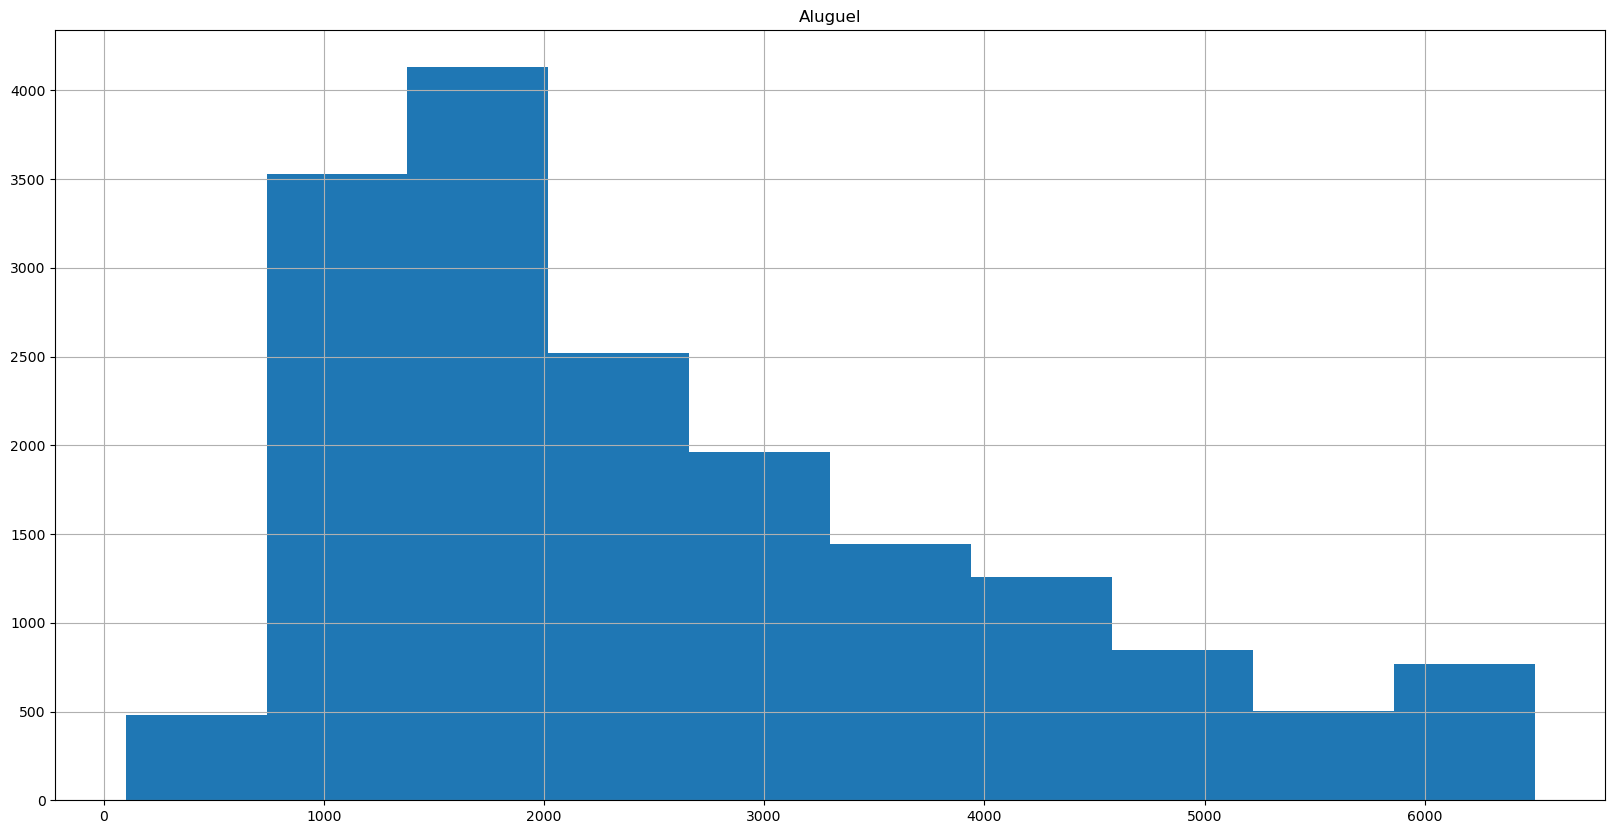

In [765]:
dados_residenciais_boxplot5.hist(['Aluguel'])
# Esse histograma já ficou bem melhor que o anterior, 
# apenas por retirar os pontos muito discrepantes.

##### 2.4.3.2 Para os tipos de imóveis residenciais

Vamos realizar a análise por tipo de imóvel, fazendo de maneira similar ao que foi feito na subseção passada, mas dessa vez fazendo mais vezes o tratamento do Box Plot.

<AxesSubplot: title={'center': 'Aluguel'}, xlabel='[Tipo]'>

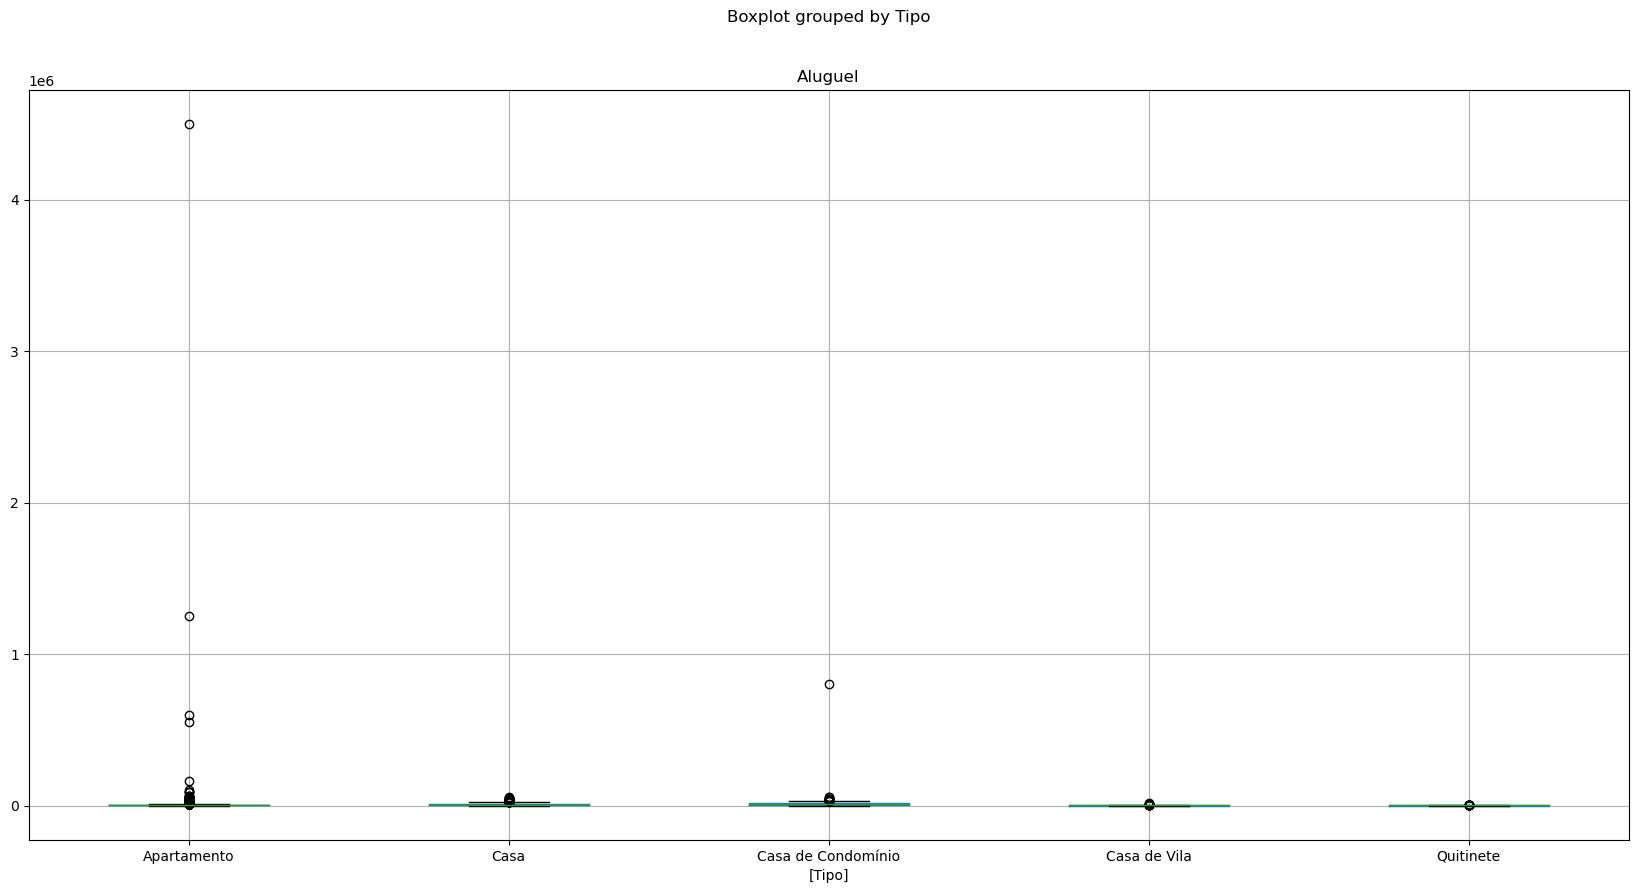

In [766]:
dados_residenciais.boxplot(['Aluguel'], by = ['Tipo'])

In [767]:
grupo_tipo = dados_residenciais.groupby('Tipo')['Aluguel']
type(grupo_tipo)
# Antes trabalhamos com tipo DataFrameGroupBy, agora é SeriesGroupBy.

pandas.core.groupby.generic.SeriesGroupBy

In [768]:
grupo_tipo.groups
# É possível ver a diferença com relação ao DataFrameGroupBy.

{'Apartamento': [2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 76, 77, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, ...], 'Casa': [1, 19, 51, 54, 93, 97, 141, 157, 177, 235, 247, 250, 261, 283, 307, 313, 331, 336, 353, 374, 381, 395, 420, 429, 469, 470, 476, 506, 537, 538, 562, 566, 567, 612, 615, 624, 629, 630, 654, 670, 694, 715, 718, 754, 765, 774, 850, 867, 931, 976, 1023, 1030, 1110, 1115, 1117, 1149, 1170, 1240, 1247, 1307, 1324, 1339, 1360, 1400, 1414, 1418, 1427, 1432, 1459, 1462, 1475, 1573, 1591, 1643, 1649, 1653, 1658, 1671, 1696, 1704, 1749, 1796, 1821, 1861, 1891, 1919, 1928, 1946, 2005, 2025, 2042, 2061, 2087, 2093, 2094, 2119, 2156, 2187, 2190, 2197, ...], 'Casa de 

In [769]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [770]:
# As variáveis agora são séries, armazenando os valores para cada tipo de imóvel.
# Veja Q1, por exemplo.
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4250.0
Casa de Vila           750.0
Quitinete              920.0
Name: Aluguel, dtype: float64

In [771]:
# Retirando os outliers e organizando os dados.
dados_tipo_boxplot1 = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    verificando_tipo = dados_residenciais['Tipo'] == tipo
    dentro_limite = (dados_residenciais['Aluguel'] >= limite_inferior[tipo]) & (dados_residenciais['Aluguel'] <= limite_superior[tipo])
    selecao = verificando_tipo & dentro_limite
    dados_selecao = dados_residenciais[selecao]
    dados_tipo_boxplot1 = pd.concat([dados_tipo_boxplot1, dados_selecao])
    adj_index(dados_tipo_boxplot1) # Correção dos índices.
dados_tipo_boxplot1

,Tipo,Bairro,Area,Aluguel,Condominio,Valor Bruto,Valor / m^2
0,Apartamento,Centro,15,800.0,390.0,1190.0,79.3
1,Apartamento,Higienópolis,48,800.0,230.0,1030.0,21.5
2,Apartamento,Cachambi,50,1300.0,301.0,1601.0,32.0
3,Apartamento,Grajaú,70,1500.0,642.0,2142.0,30.6
4,Apartamento,Lins de Vasconcelos,90,1500.0,455.0,1955.0,21.7
...,...,...,...,...,...,...,...
19669,Quitinete,Glória,10,400.0,107.0,507.0,50.7
19670,Quitinete,Flamengo,23,900.0,605.0,1505.0,65.4
19671,Quitinete,Centro,24,1100.0,323.0,1423.0,59.3
19672,Quitinete,Copacabana,22,1500.0,286.0,1786.0,81.2


<AxesSubplot: title={'center': 'Aluguel'}, xlabel='[Tipo]'>

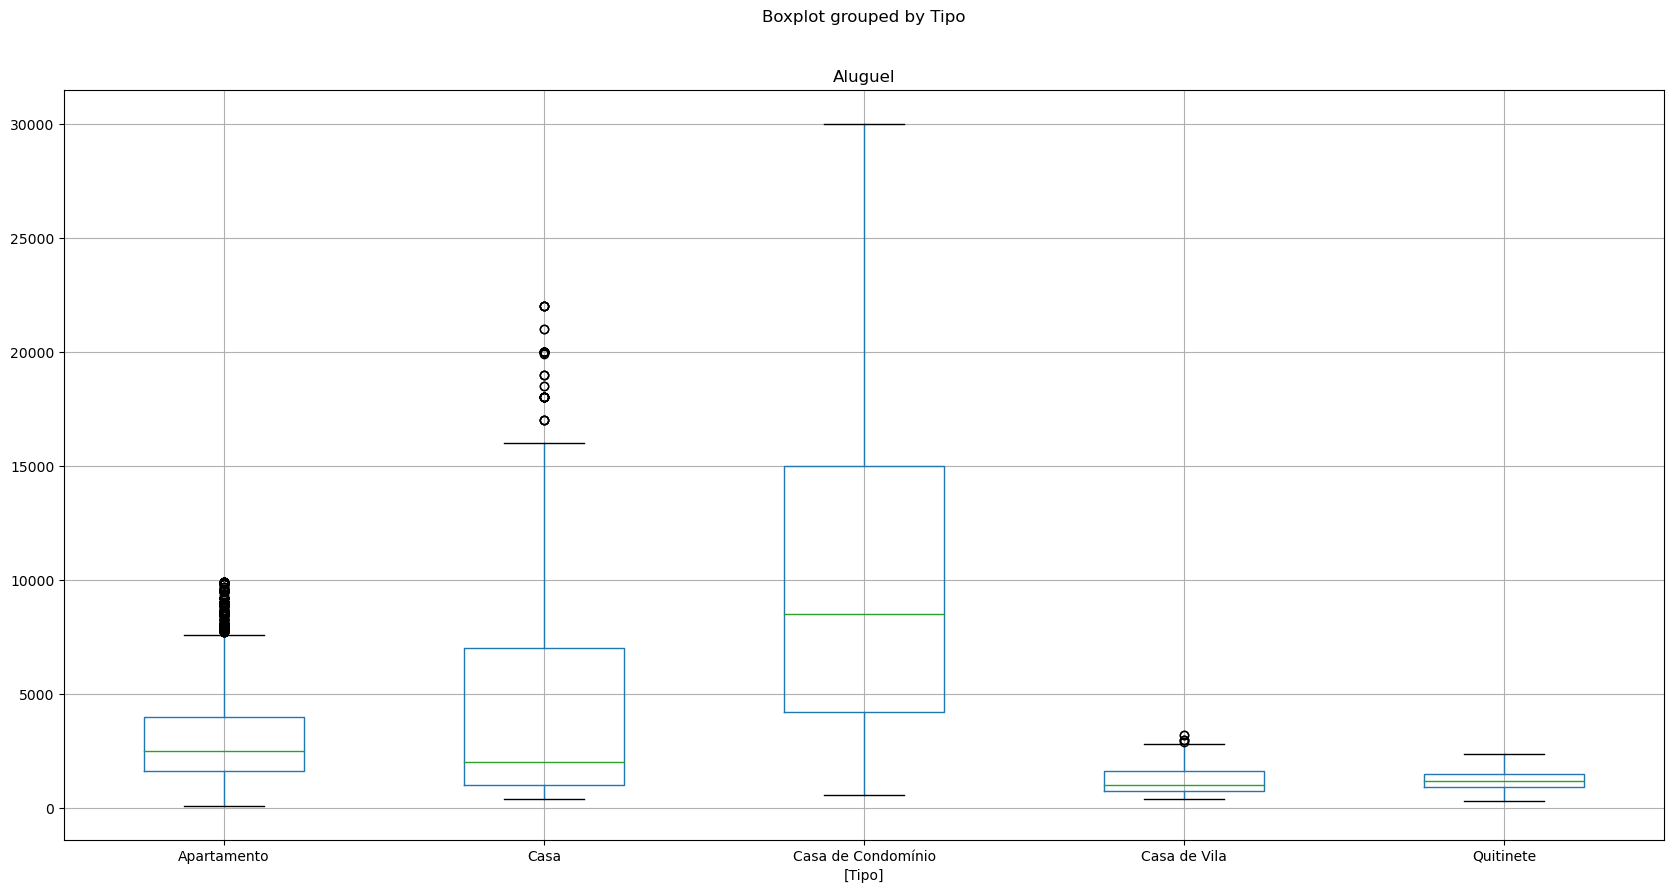

In [772]:
dados_tipo_boxplot1.boxplot(['Aluguel'], by = ['Tipo'])
# "Quitinete" e "Casa de Condomínio" já ficaram sem os outliers.
# "Casa" e "Casa de Vila" podemos tirar os poucos pontos restantes.
# "Apartamento" tem muitos dados para tirar.

In [773]:
# Definindo a função que faz todo o necessário para imprimir 
# o Box Plot, pois será muito usada.
def boxplot_function_type(Data_frame1):
    #----------------Definindo os limites para o Box Plot------------------#
    grupo_tipo = Data_frame1.groupby('Tipo')['Aluguel']
    Q1 = grupo_tipo.quantile(.25)
    Q3 = grupo_tipo.quantile(.75)
    IIQ = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IIQ
    limite_superior = Q3 + 1.5 * IIQ
    #----Retirando os outliers e organizando os dados para o Box Plot-----#
    Data_frame2 = pd.DataFrame()
    for tipo in grupo_tipo.groups.keys():
        verificando_tipo = Data_frame1['Tipo'] == tipo
        dentro_limite = (Data_frame1['Aluguel'] >= limite_inferior[tipo]) & (Data_frame1['Aluguel'] <= limite_superior[tipo])
        selecao = verificando_tipo & dentro_limite
        dados_selecao = Data_frame1[selecao]
        Data_frame2 = pd.concat([Data_frame2, dados_selecao])
        adj_index(Data_frame2)
    Data_frame2.boxplot(['Aluguel'], by = ['Tipo'])
    return Data_frame2

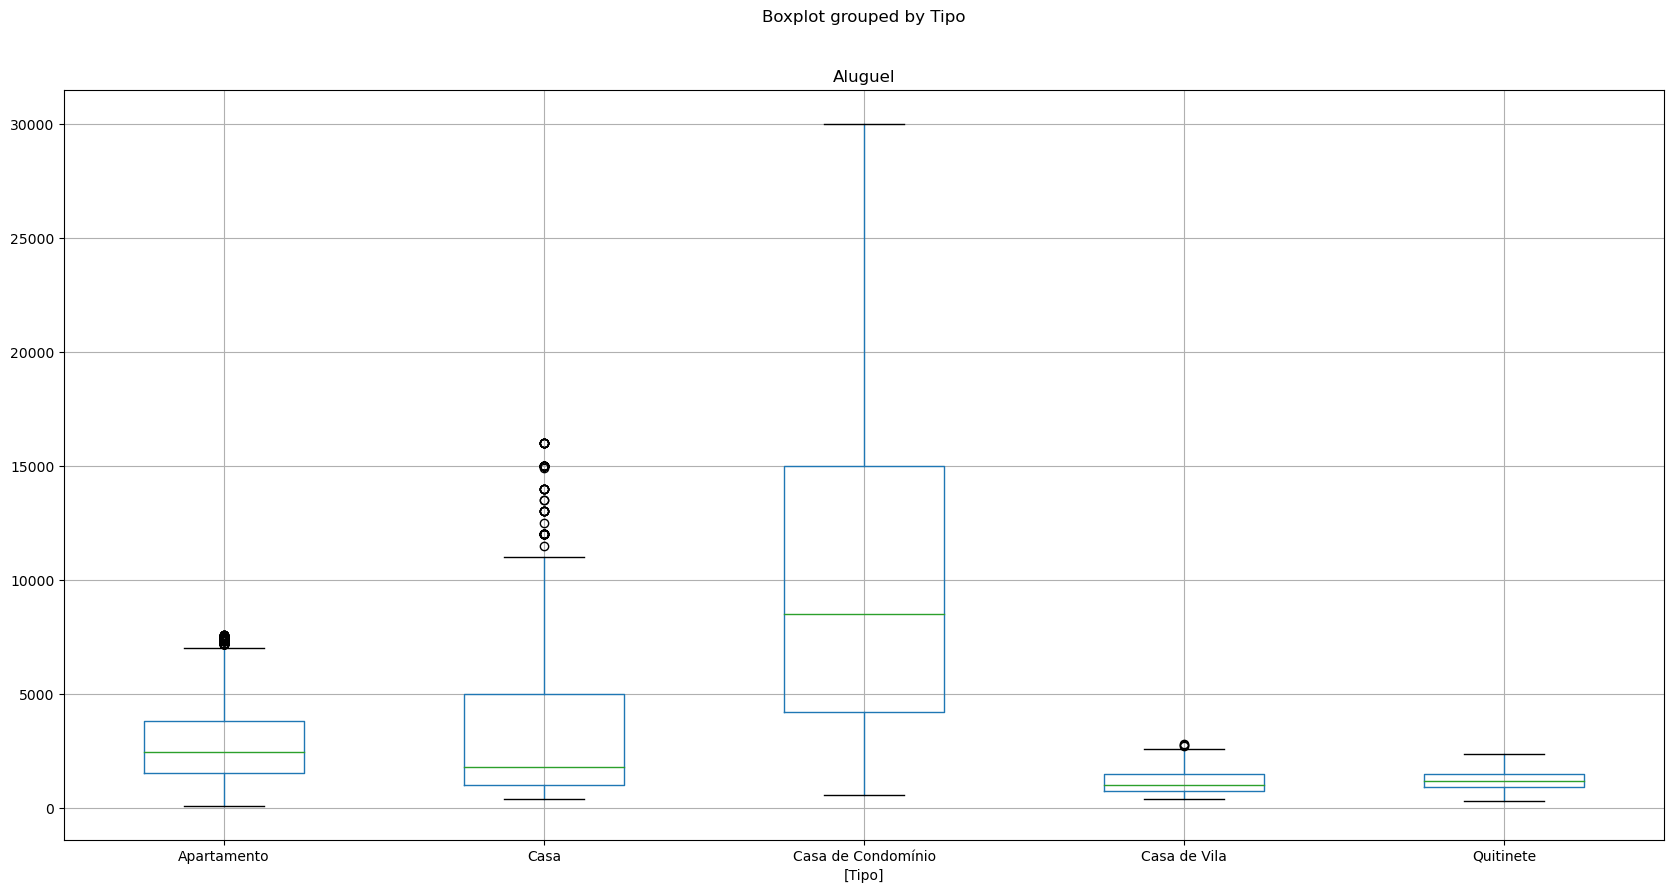

In [774]:
dados_tipo_boxplot2 = boxplot_function_type(dados_tipo_boxplot1)
# O tipo "Casa", "Apartamento" e "Casa de Vila" ainda estão com 
# indicações de outliers, então vamos fazer o processo.
# Enquanto tiver outliers, vamos repetir o processo.

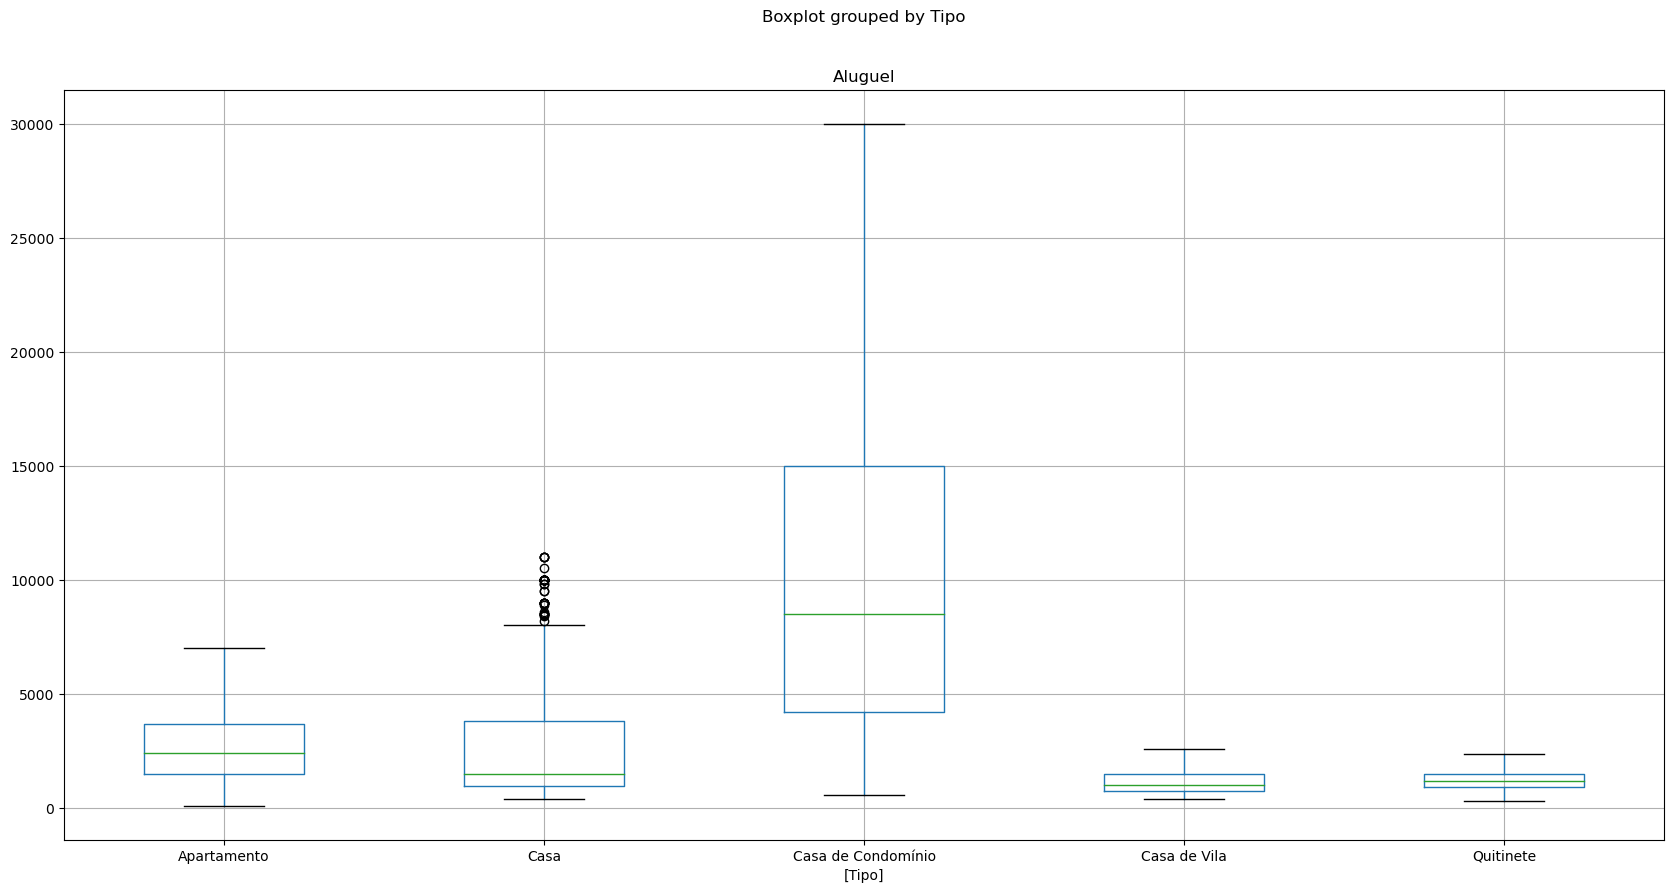

In [775]:
dados_tipo_boxplot3 = boxplot_function_type(dados_tipo_boxplot2)

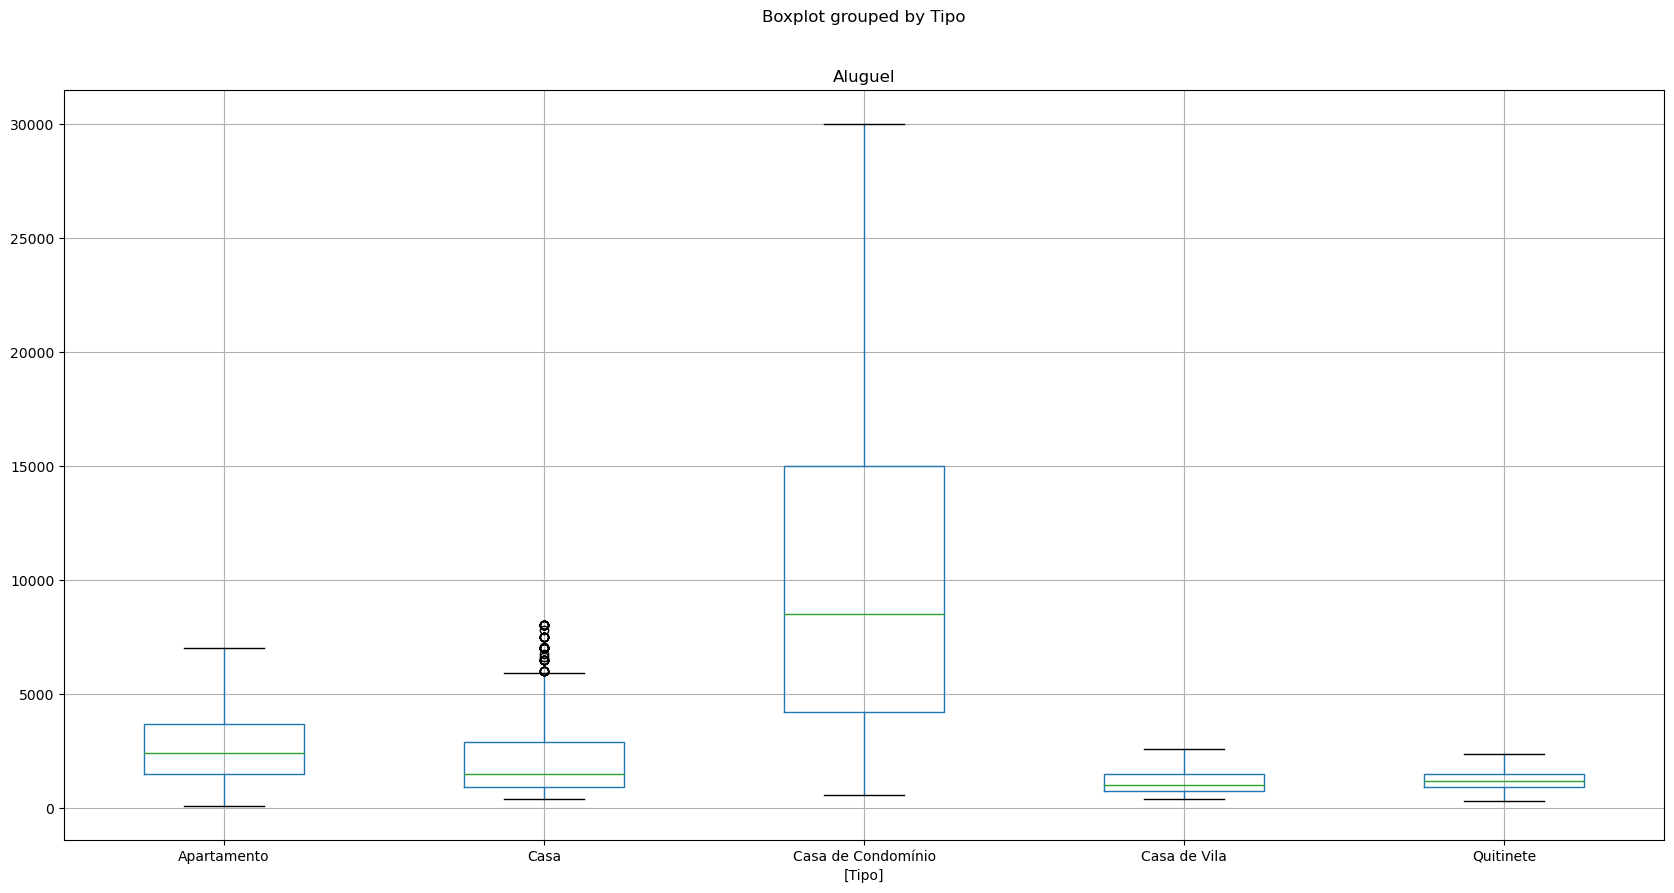

In [776]:
dados_tipo_boxplot4 = boxplot_function_type(dados_tipo_boxplot3)

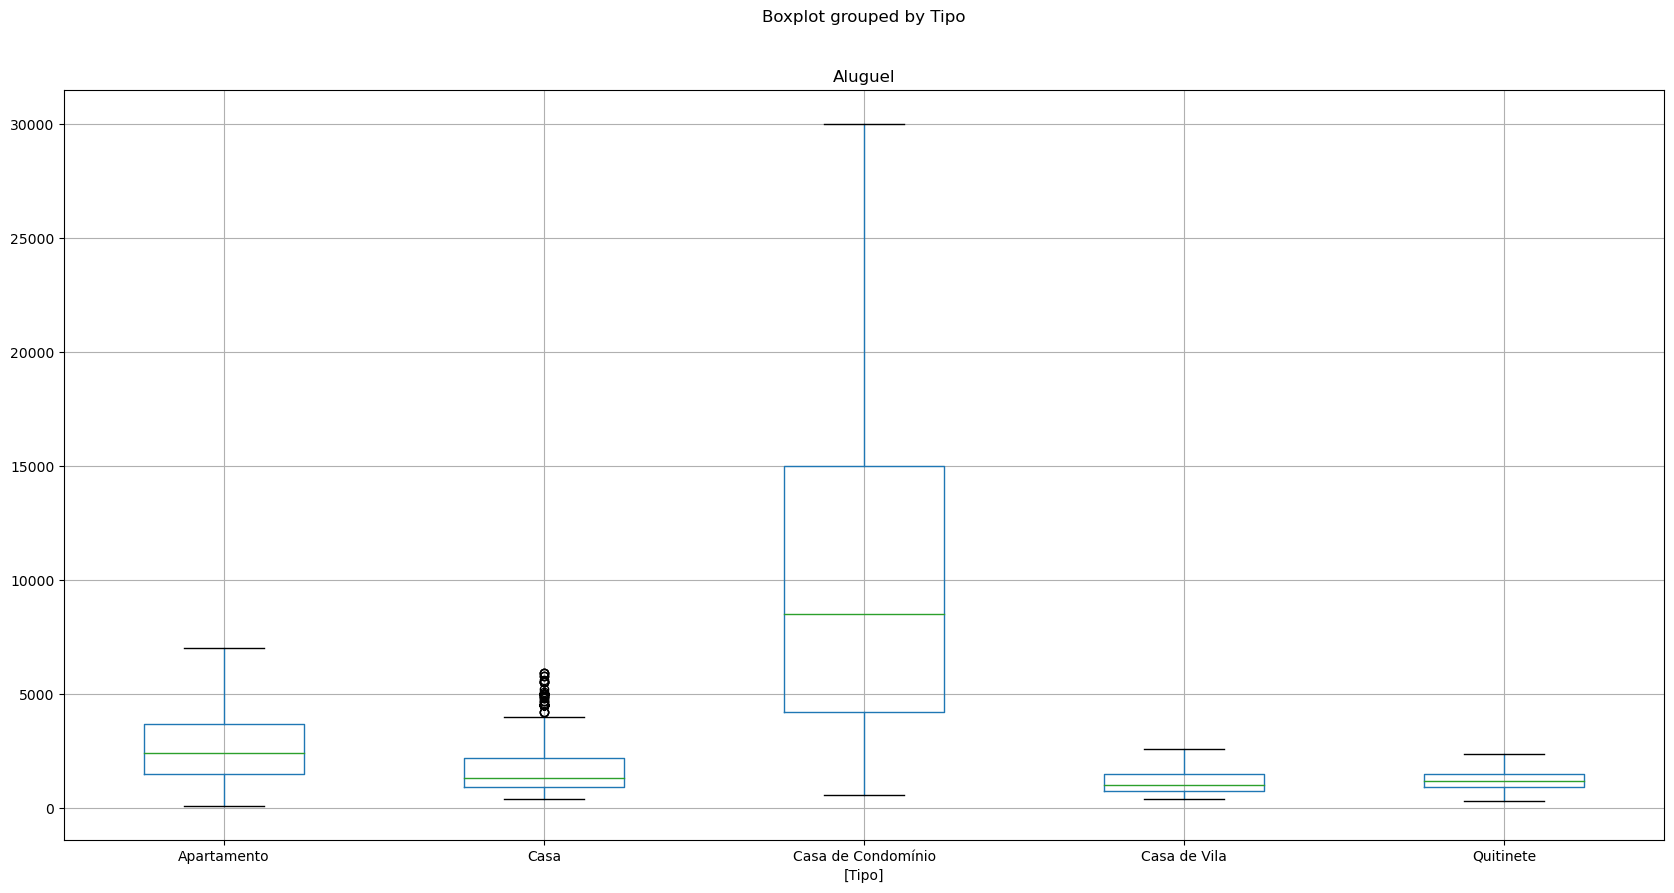

In [777]:
dados_tipo_boxplot5 = boxplot_function_type(dados_tipo_boxplot4)

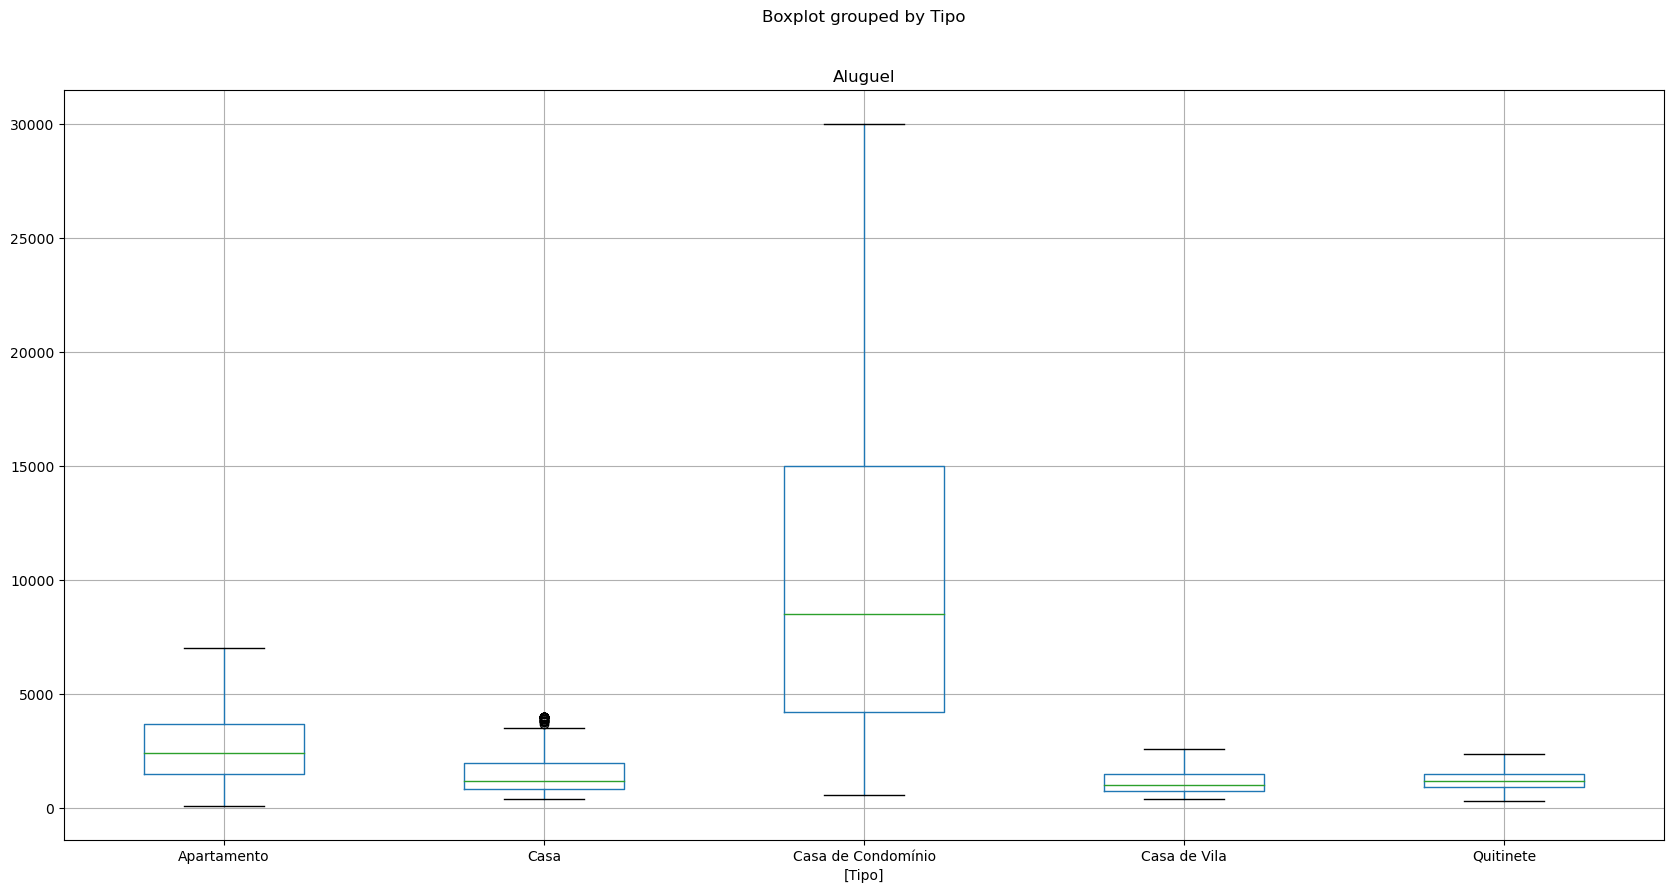

In [778]:
dados_tipo_boxplot6 = boxplot_function_type(dados_tipo_boxplot5)

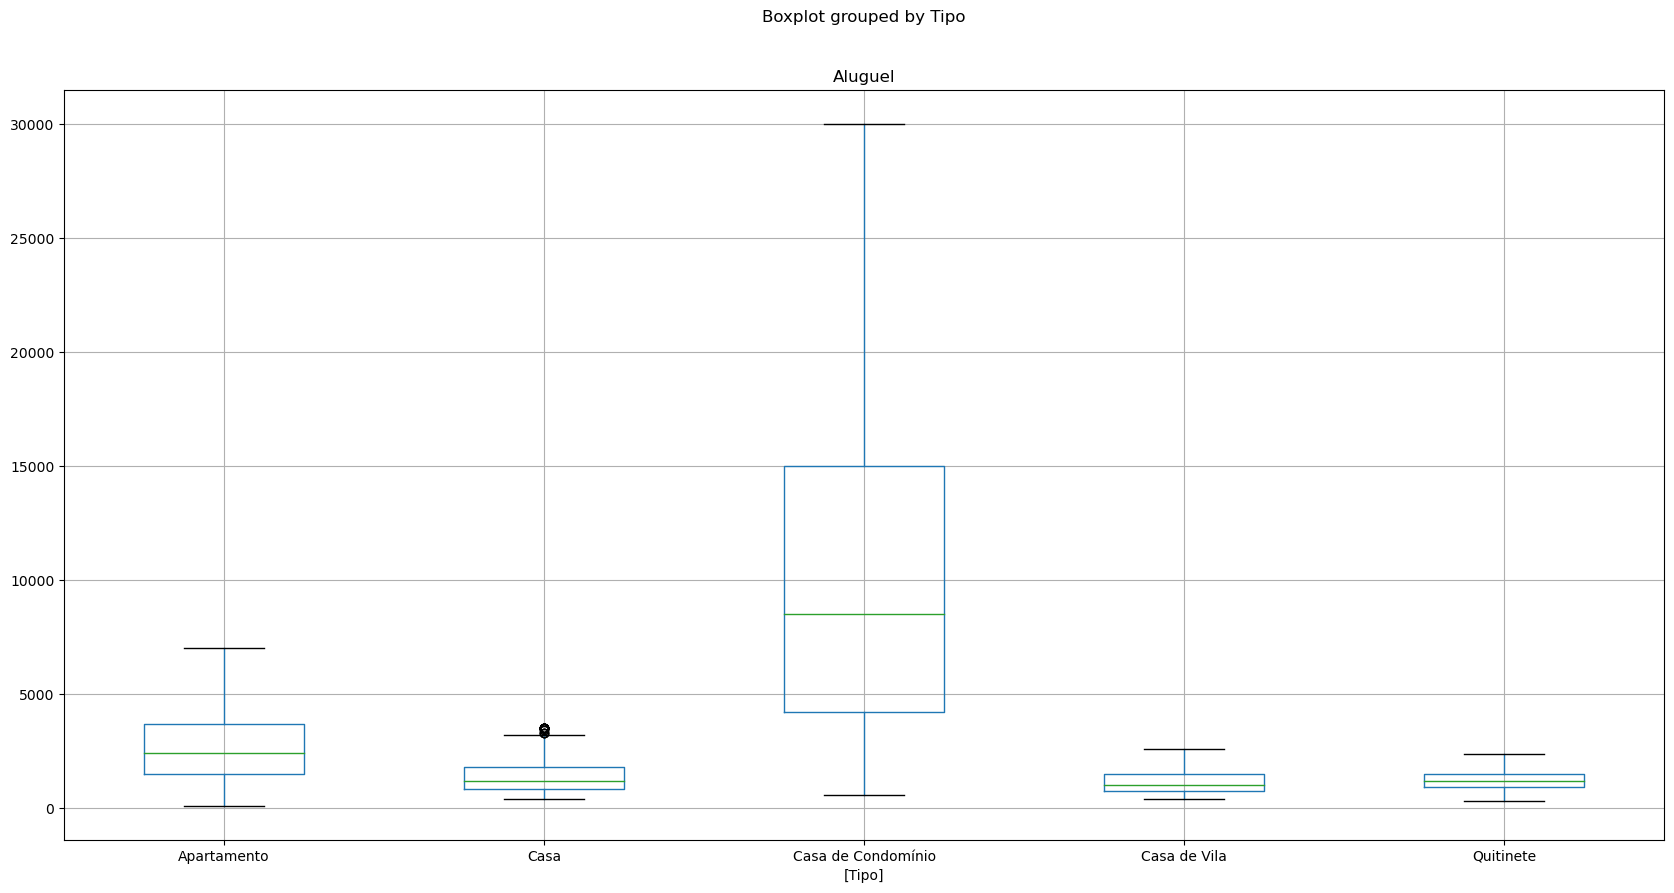

In [779]:
dados_tipo_boxplot7 = boxplot_function_type(dados_tipo_boxplot6)

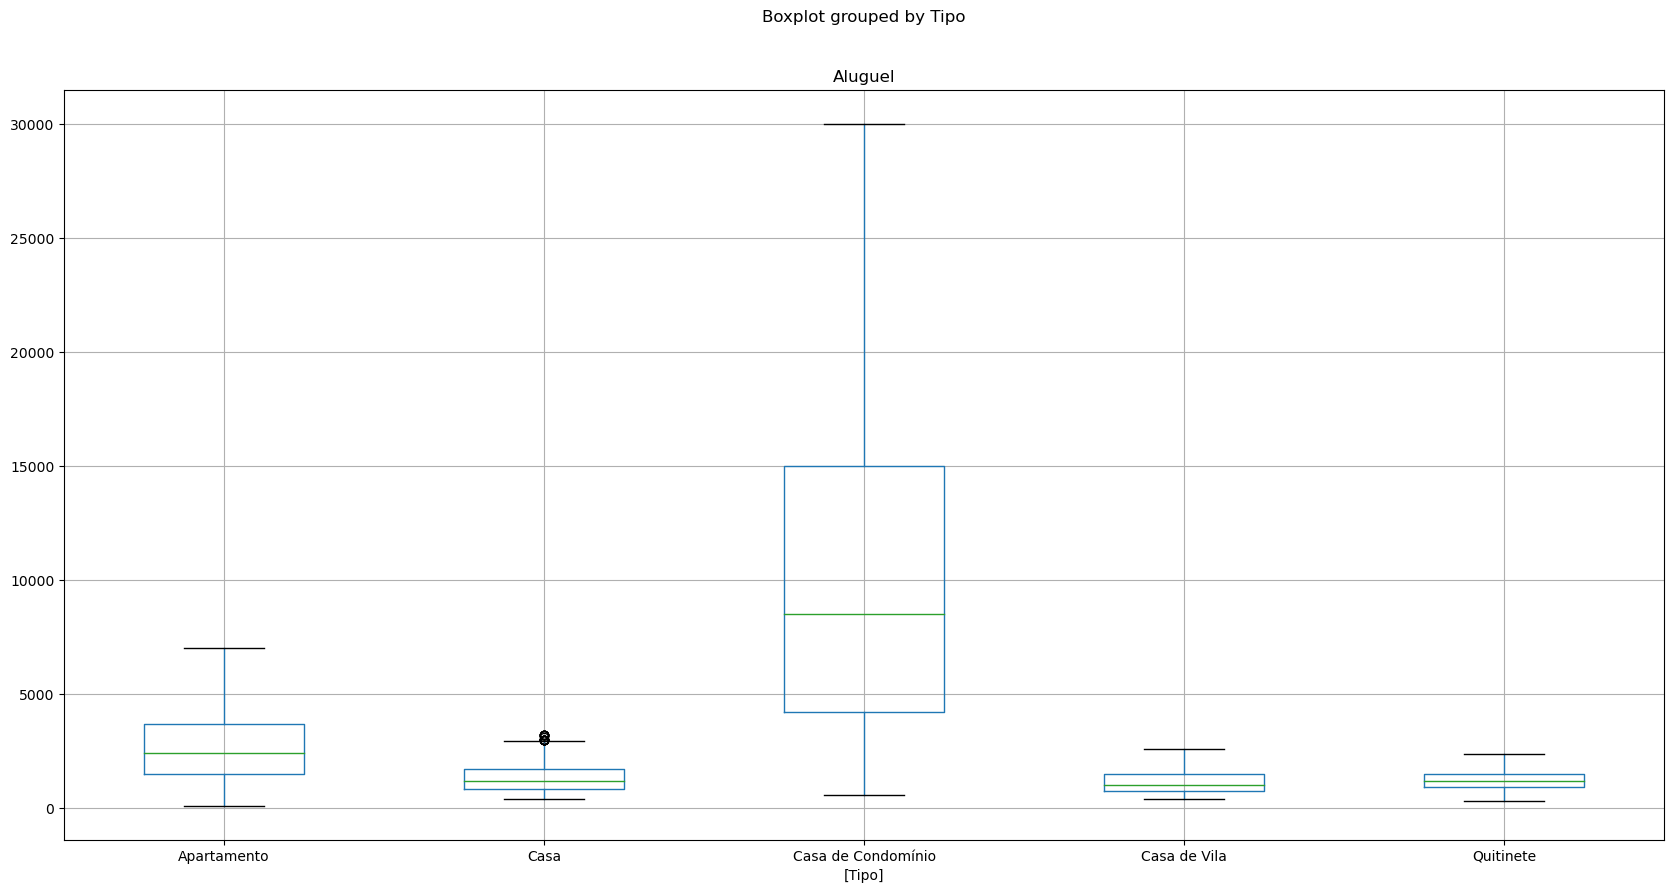

In [780]:
dados_tipo_boxplot8 = boxplot_function_type(dados_tipo_boxplot7)

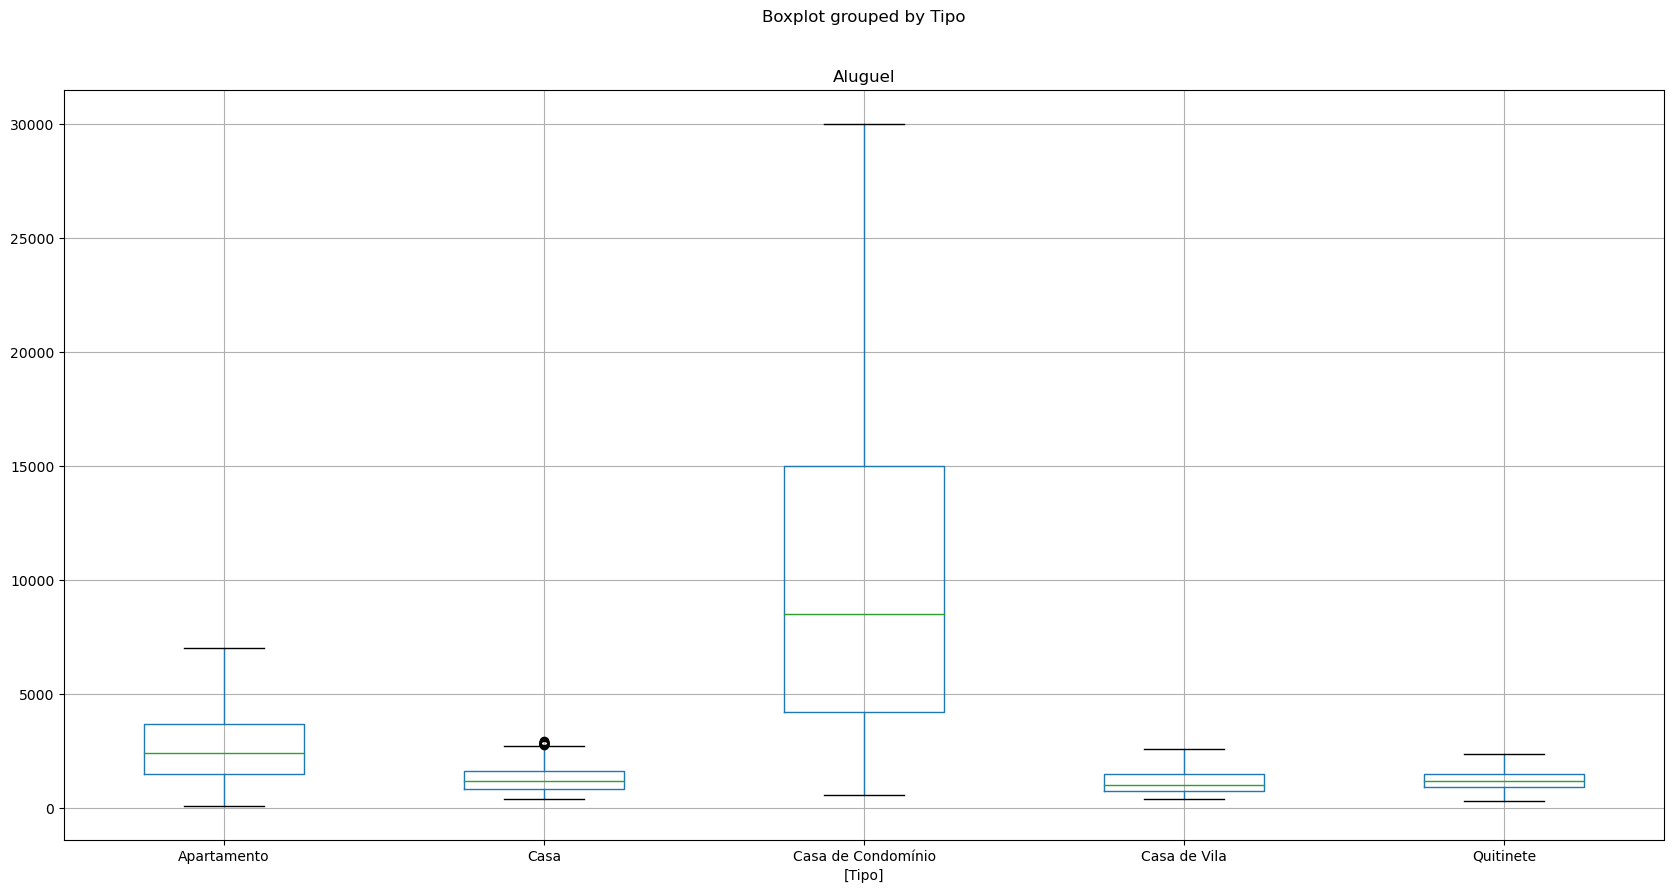

In [781]:
dados_tipo_boxplot9 = boxplot_function_type(dados_tipo_boxplot8)

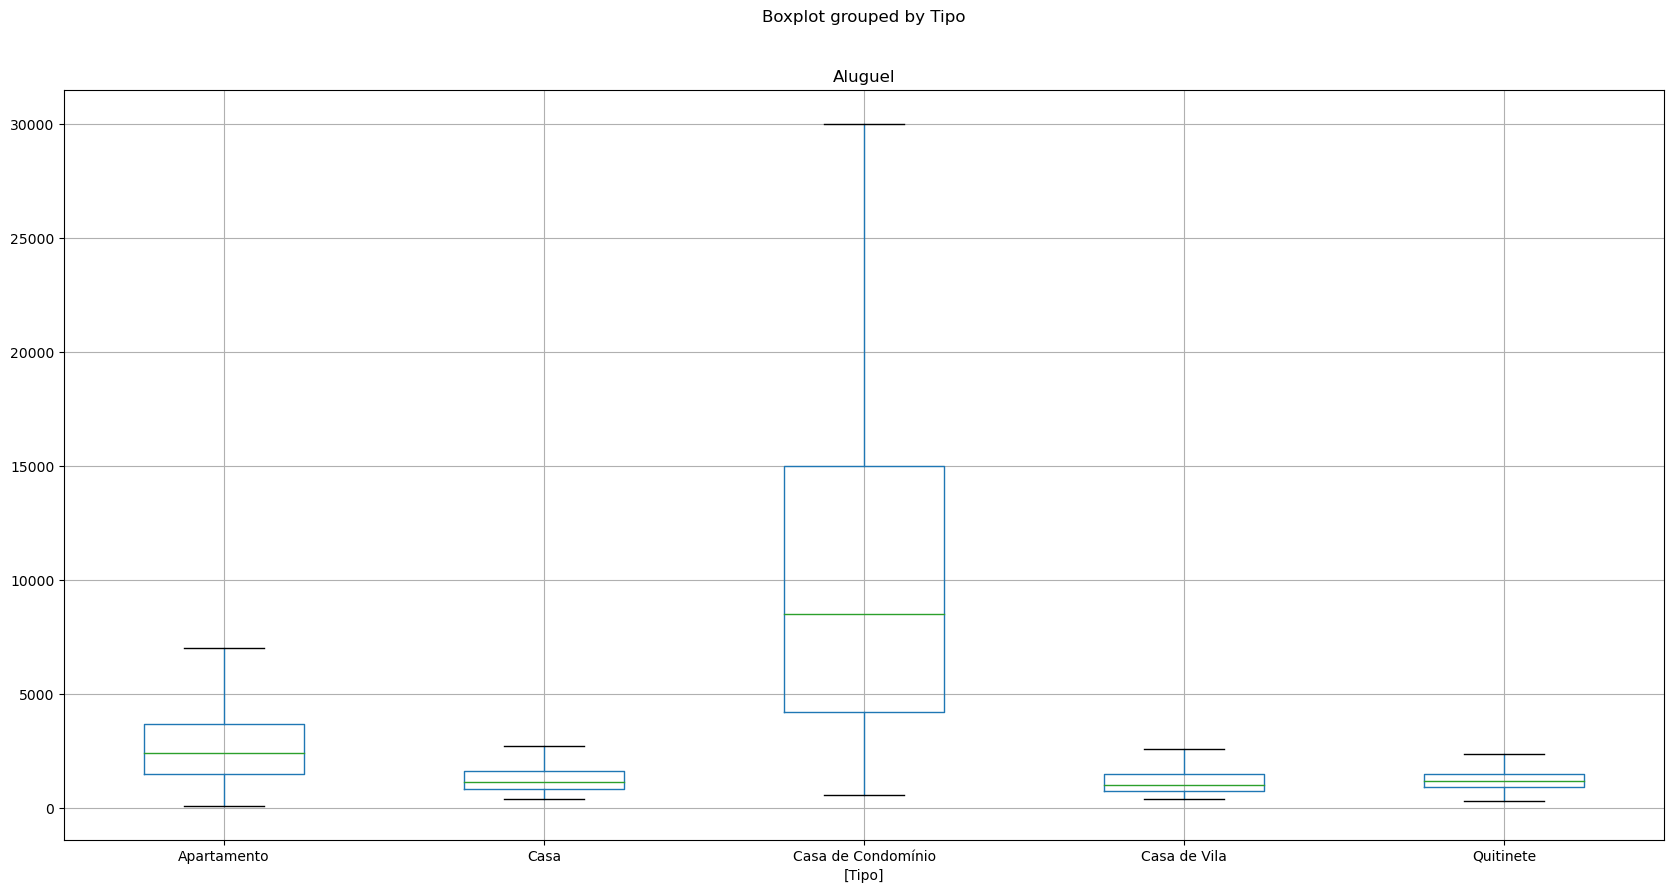

In [782]:
dados_tipo_boxplot10 = boxplot_function_type(dados_tipo_boxplot9)

In [783]:
print(f'Usando o Box Plot para os dados organizados por tipo, foram excluídos {dados_residenciais.shape[0]-dados_tipo_boxplot10.shape[0]} imóveis na forma de outliers, uma diminuição equivalente à, \n aproximadamente, {100*(1-dados_tipo_boxplot10.shape[0]/dados_residenciais.shape[0]):,.0f}%.')

# Definindo a função que imprime a quantidade de dados
# tirados como outliers e qual a porcentagem que ele representa.
def quantidade_excluidos_tipo(tipo_imovel):
    if tipo_imovel in residencial:
        selecao1 = dados_residenciais['Tipo'] == "{}".format(tipo_imovel)
        selecao2 = dados_tipo_boxplot10['Tipo'] == "{}".format(tipo_imovel)
        if dados_residenciais[selecao1].shape[0] != 0:
            print(f'- Foram {dados_residenciais[selecao1].shape[0]-dados_tipo_boxplot10[selecao2].shape[0]} imóveis do tipo "{tipo_imovel}". Diminuição equivalente à, aproximadamente, {100*(1-dados_tipo_boxplot10[selecao2].shape[0]/dados_residenciais[selecao1].shape[0]):,.0f}%.')
        else: 
            print(f'- Foram {dados_residenciais[selecao1].shape[0]-dados_tipo_boxplot10[selecao2].shape[0]} imóveis do tipo "{tipo_imovel}". Diminuição equivalente à 0%.')
    else:
        print('É necessário que seja um dos elementos da lista:')
        print(residencial)

# Usando a função para todos os imóveis residenciais.
for tipo_imovel in residencial:
    quantidade_excluidos_tipo(tipo_imovel)

Usando o Box Plot para os dados organizados por tipo, foram excluídos 3495 imóveis na forma de outliers, uma diminuição equivalente à, 
 aproximadamente, 16%.
- Foram 2971 imóveis do tipo "Apartamento". Diminuição equivalente à, aproximadamente, 16%.
- Foram 446 imóveis do tipo "Casa". Diminuição equivalente à, aproximadamente, 46%.
- Foram 28 imóveis do tipo "Casa de Condomínio". Diminuição equivalente à, aproximadamente, 3%.
- Foram 25 imóveis do tipo "Casa de Vila". Diminuição equivalente à, aproximadamente, 10%.
- Foram 25 imóveis do tipo "Quitinete". Diminuição equivalente à, aproximadamente, 3%.


In [784]:
print(f"Com a retirada dos outliers, há {dados_tipo_boxplot10['Bairro'].drop_duplicates().shape[0]} bairros.")

bairro_excluido = (set(list(dados_residenciais['Bairro'].drop_duplicates())) 
                   - set(list(dados_tipo_boxplot10['Bairro'].drop_duplicates()))
                  )

print(f"Excluimos o(s) bairro(s) {list(bairro_excluido)[0]}, que tinha(m) {dados_residenciais[dados_residenciais['Bairro'].isin(list(bairro_excluido))].shape[0]} imóvel(is).")

Com a retirada dos outliers, há 151 bairros.
Excluimos o(s) bairro(s) Cidade Jardim, que tinha(m) 1 imóvel(is).


In [785]:
dados_tipo_boxplot10.to_csv('Arquivos_gerados_no_código/Base de dados de imóveis residenciais - Versão final.csv', sep = ';', index = False)
# Exportando a nova base de dados, que contem apenas os imóveis residenciais,
# que agora estão tratados, com as novas variáveis e sem os outliers.
dados_tipo_boxplot10

,Tipo,Bairro,Area,Aluguel,Condominio,Valor Bruto,Valor / m^2
0,Apartamento,Centro,15,800.0,390.0,1190.0,79.3
1,Apartamento,Higienópolis,48,800.0,230.0,1030.0,21.5
2,Apartamento,Cachambi,50,1300.0,301.0,1601.0,32.0
3,Apartamento,Grajaú,70,1500.0,642.0,2142.0,30.6
4,Apartamento,Lins de Vasconcelos,90,1500.0,455.0,1955.0,21.7
...,...,...,...,...,...,...,...
18167,Quitinete,Glória,10,400.0,107.0,507.0,50.7
18168,Quitinete,Flamengo,23,900.0,605.0,1505.0,65.4
18169,Quitinete,Centro,24,1100.0,323.0,1423.0,59.3
18170,Quitinete,Copacabana,22,1500.0,286.0,1786.0,81.2


#### 2.4.4 Recalculando dos valores estatísticos descritivos do aluguel

Com a retirada dos outliers, podemos fazer os cálculos dos valores estatísticos descritivos novamente, similar ao que foi feito no item 2.4.2, mas agora usando os dados que foram organizados por tipo para retirada dos outliers.

##### 2.4.4.1 Aluguel

In [786]:
grupo_bairro = dados_tipo_boxplot3.groupby('Bairro')
grupo_bairro['Aluguel'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.33,425.32,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,5.0,1760.00,1216.24,600.0,1000.0,1600.0,1850.0,3750.0
Anchieta,4.0,875.00,132.29,700.0,812.5,900.0,962.5,1000.0
Andaraí,97.0,1464.71,408.11,700.0,1200.0,1400.0,1650.0,2950.0
Anil,70.0,2071.71,1522.69,300.0,1100.0,1500.0,2712.5,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,47.0,1466.81,680.32,800.0,1000.0,1200.0,1650.0,4500.0
Vila da Penha,99.0,1295.45,641.09,600.0,900.0,1200.0,1355.0,4500.0
Vista Alegre,16.0,1114.38,199.60,700.0,1012.5,1200.0,1225.0,1400.0


Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

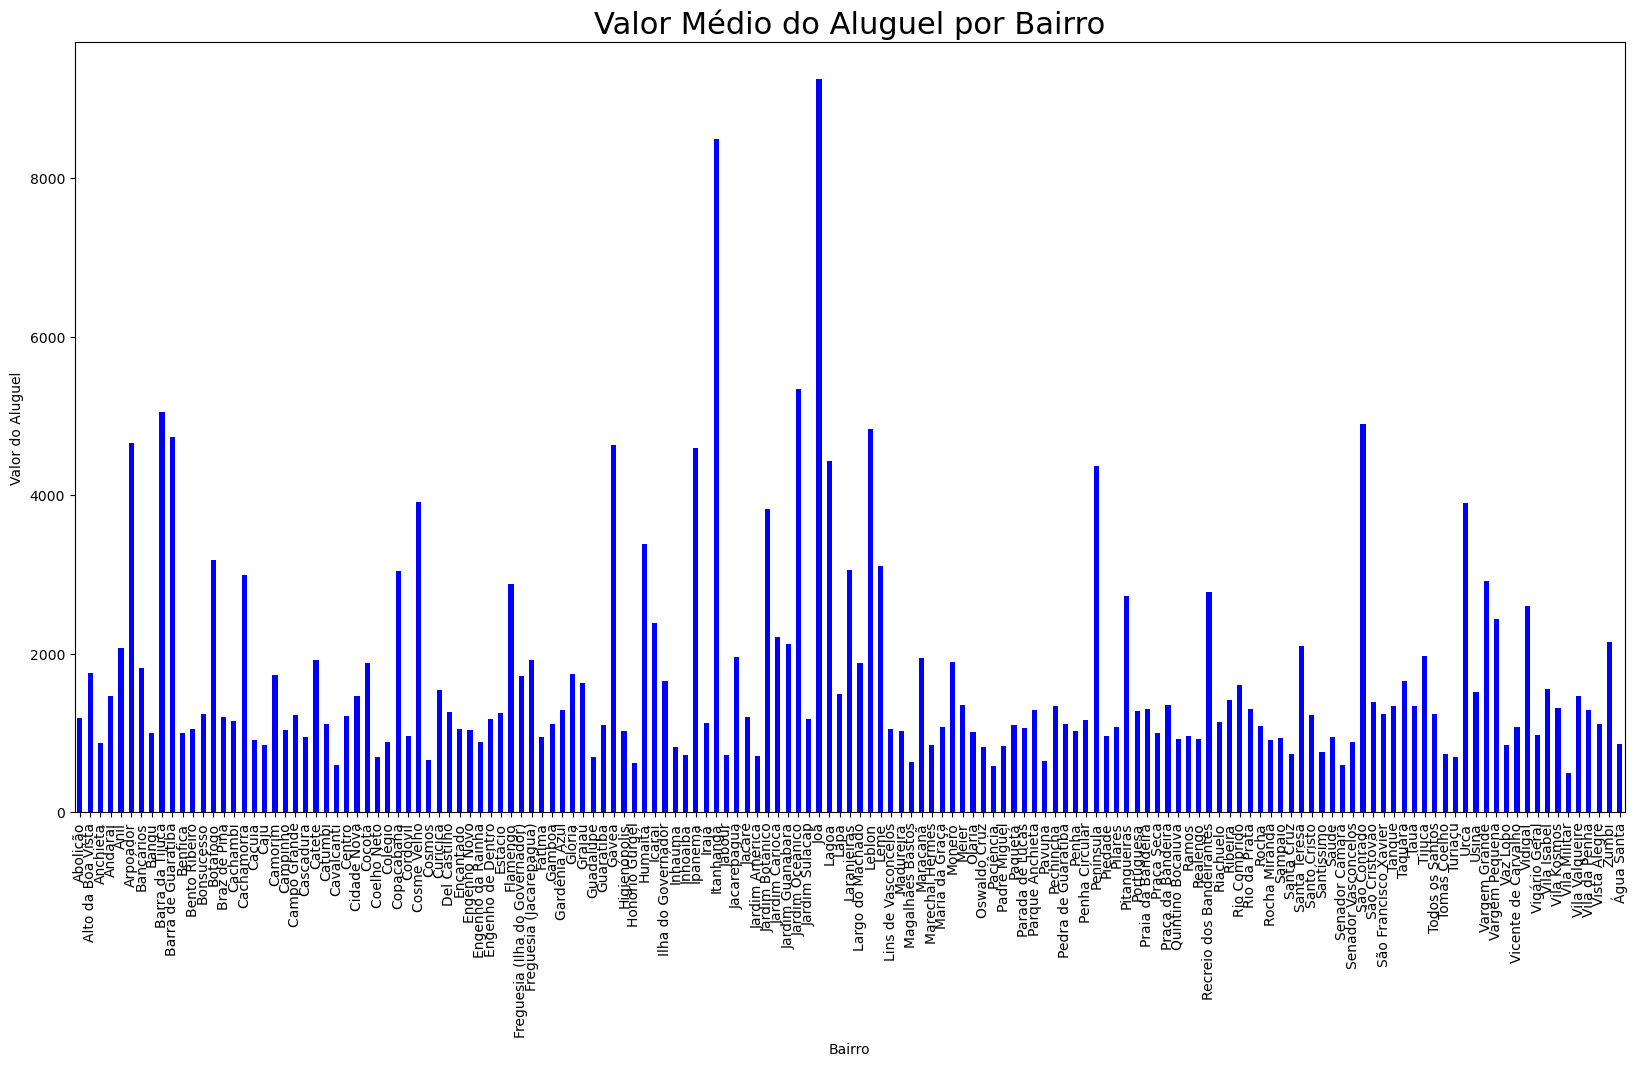

In [787]:
plt.rc('figure', figsize = (20, 10))
fig = grupo_bairro['Aluguel'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Máximo do Aluguel por Bairro')

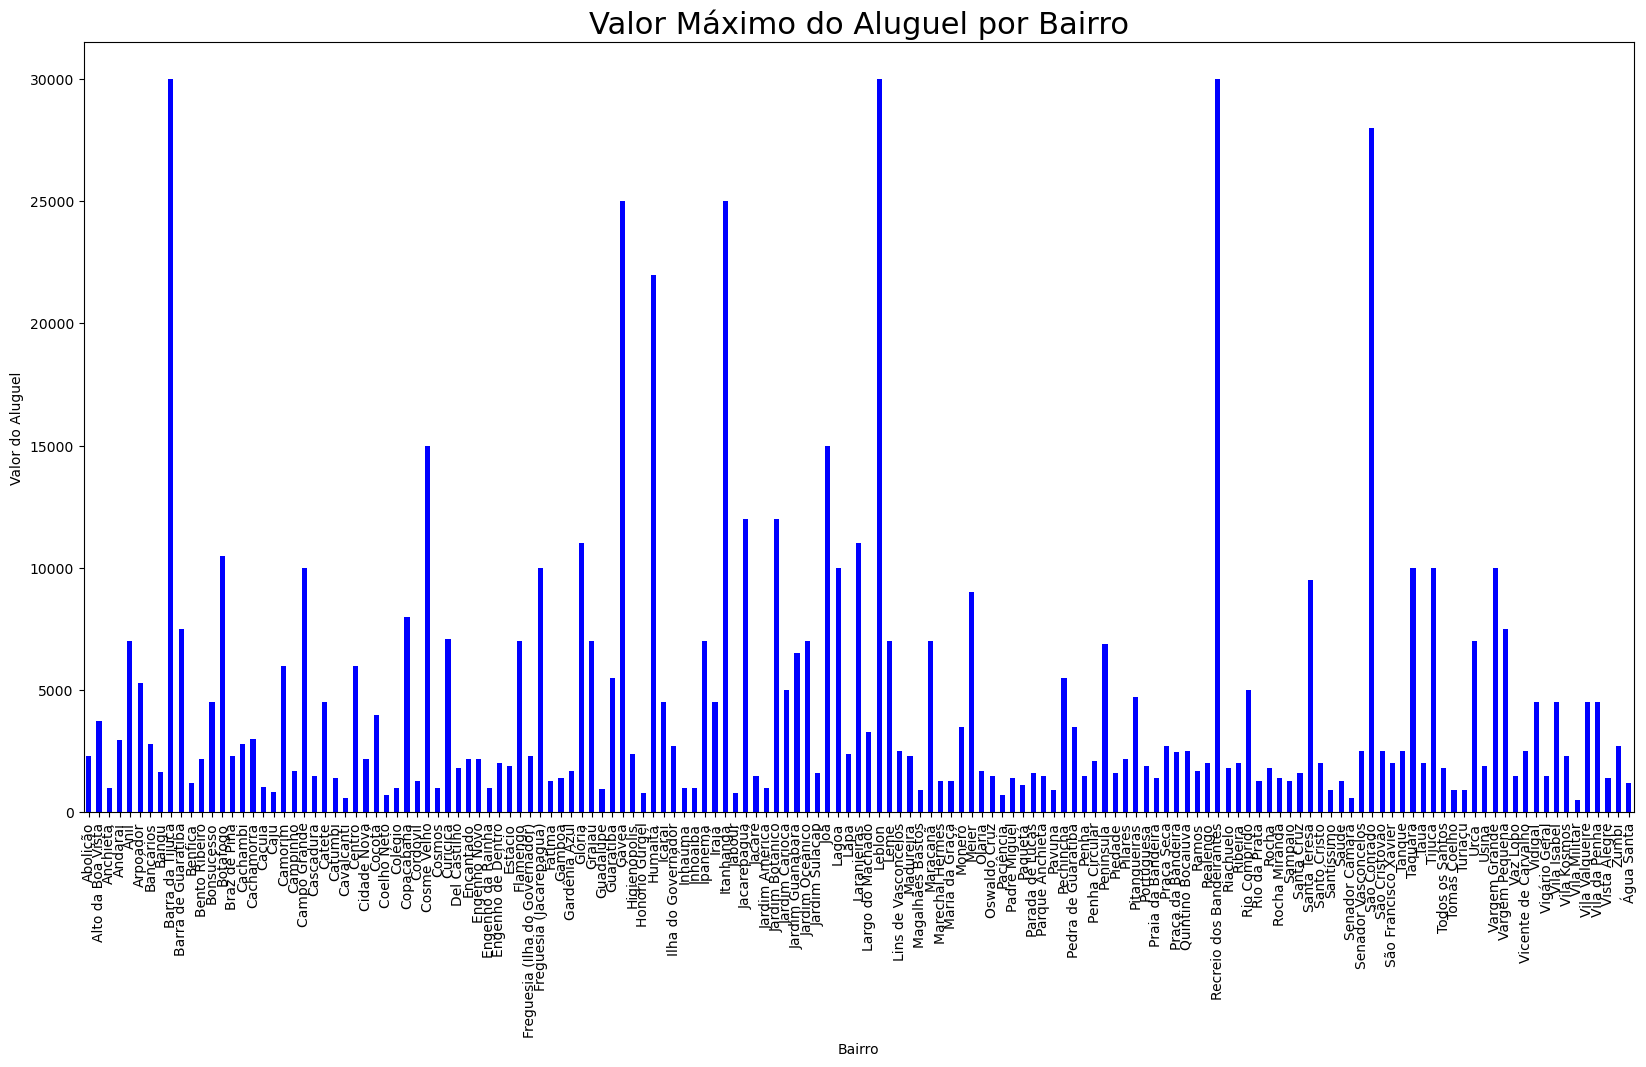

In [788]:
fig = grupo_bairro['Aluguel'].max().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Máximo do Aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Desvio Padrão do Aluguel por Bairro')

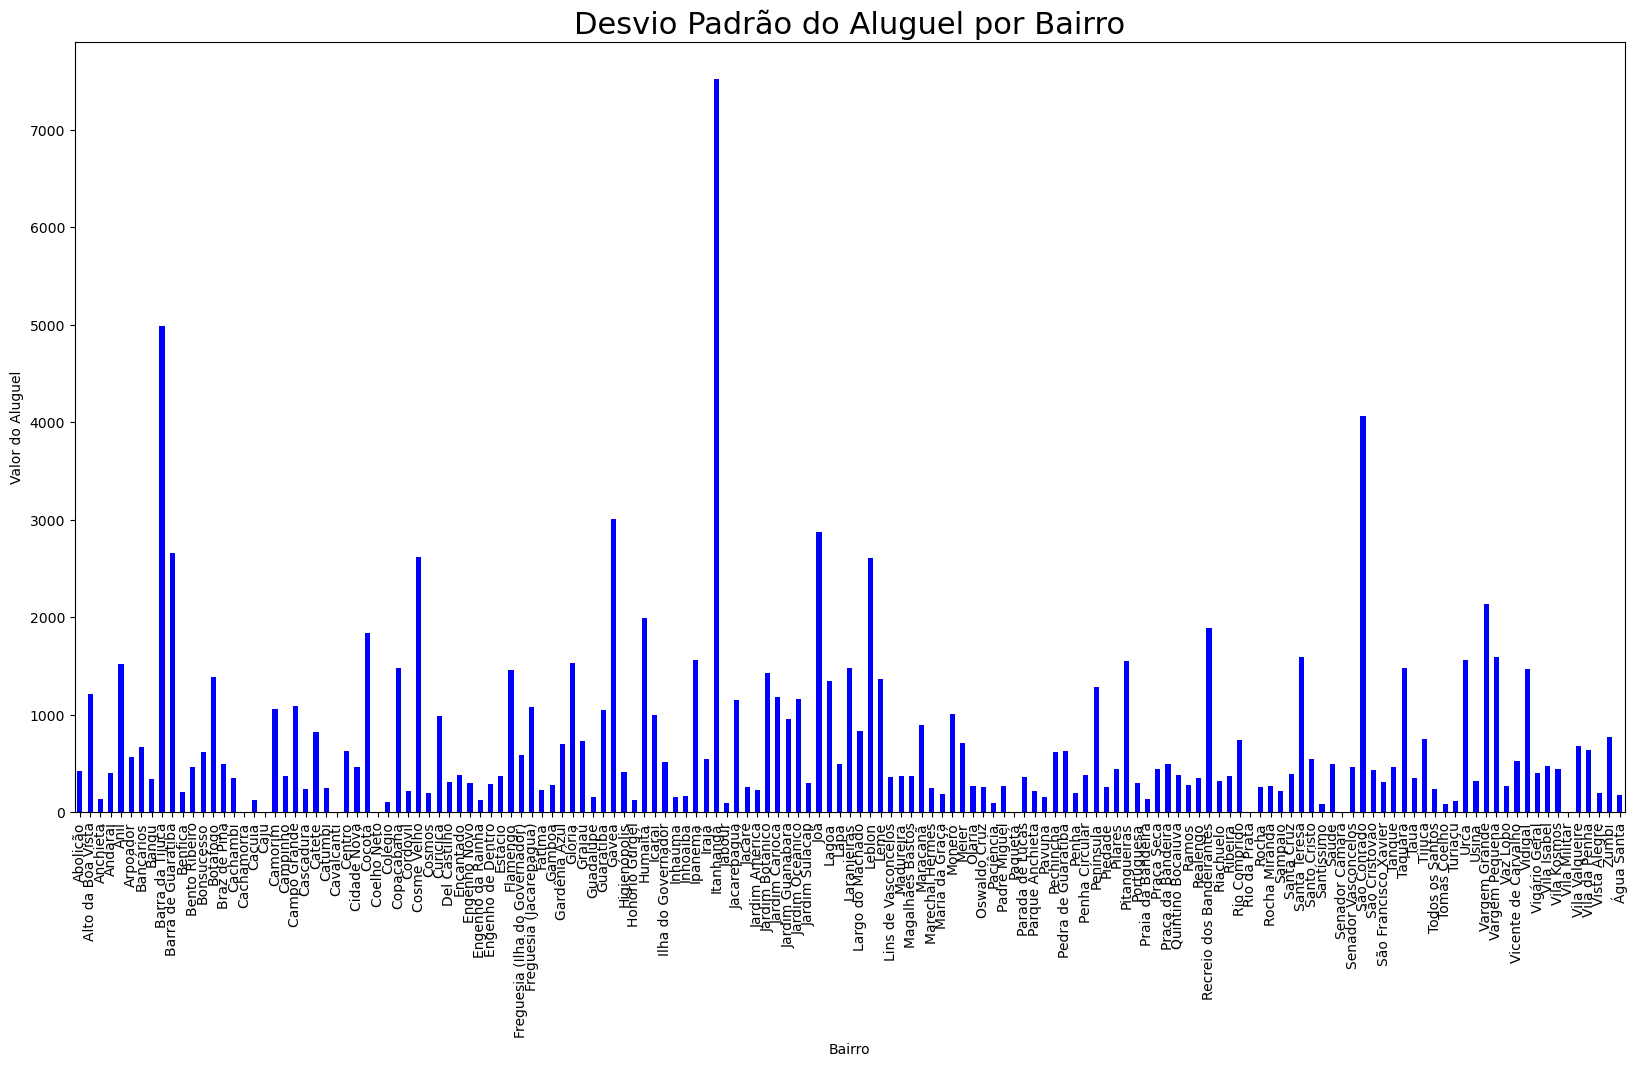

In [789]:
fig = grupo_bairro['Aluguel'].std().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Desvio Padrão do Aluguel por Bairro', {'fontsize': 22})

##### 2.4.4.2 Valor bruto

In [790]:
grupo_bairro = dados_tipo_boxplot10.groupby('Bairro')
grupo_bairro['Aluguel'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.33,425.32,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,5.0,1760.00,1216.24,600.0,1000.0,1600.0,1850.0,3750.0
Anchieta,4.0,875.00,132.29,700.0,812.5,900.0,962.5,1000.0
Andaraí,95.0,1433.97,351.79,700.0,1200.0,1400.0,1625.0,2900.0
Anil,63.0,1853.49,1370.41,300.0,1050.0,1300.0,2050.0,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,47.0,1466.81,680.32,800.0,1000.0,1200.0,1650.0,4500.0
Vila da Penha,95.0,1192.11,384.72,600.0,900.0,1100.0,1300.0,2700.0
Vista Alegre,16.0,1114.38,199.60,700.0,1012.5,1200.0,1225.0,1400.0


Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

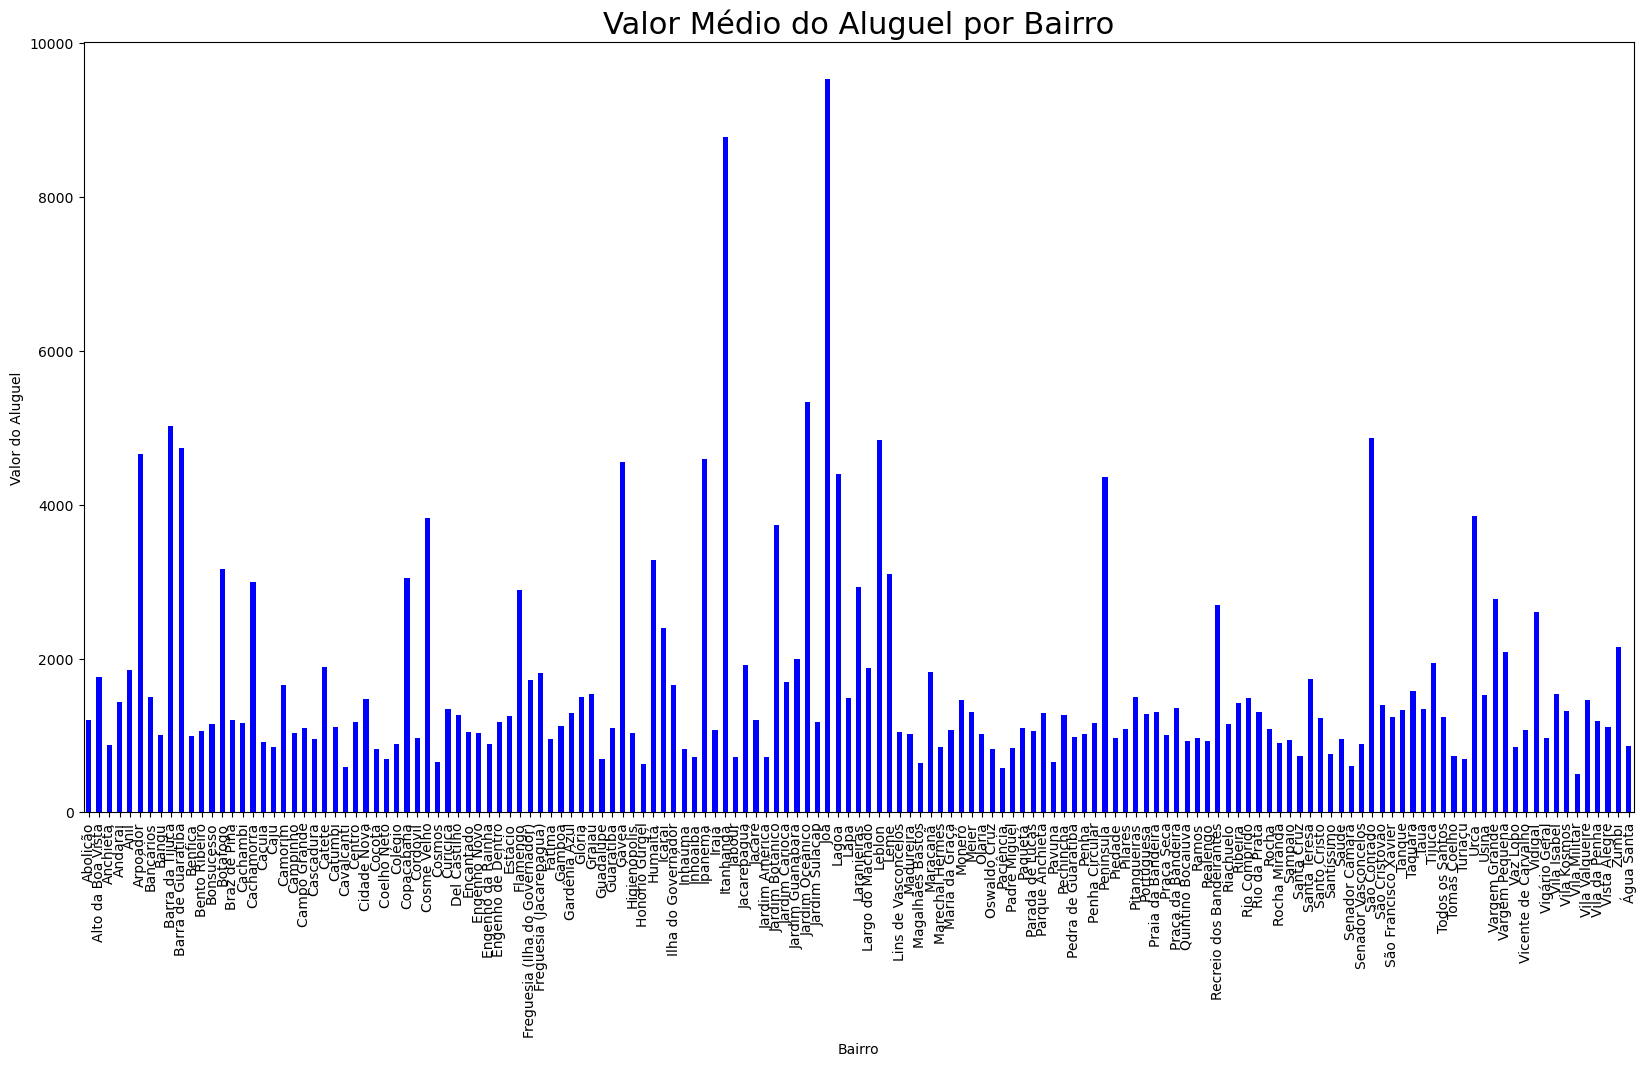

In [791]:
plt.rc('figure', figsize = (20, 10))
fig = grupo_bairro['Aluguel'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Máximo do Aluguel por Bairro')

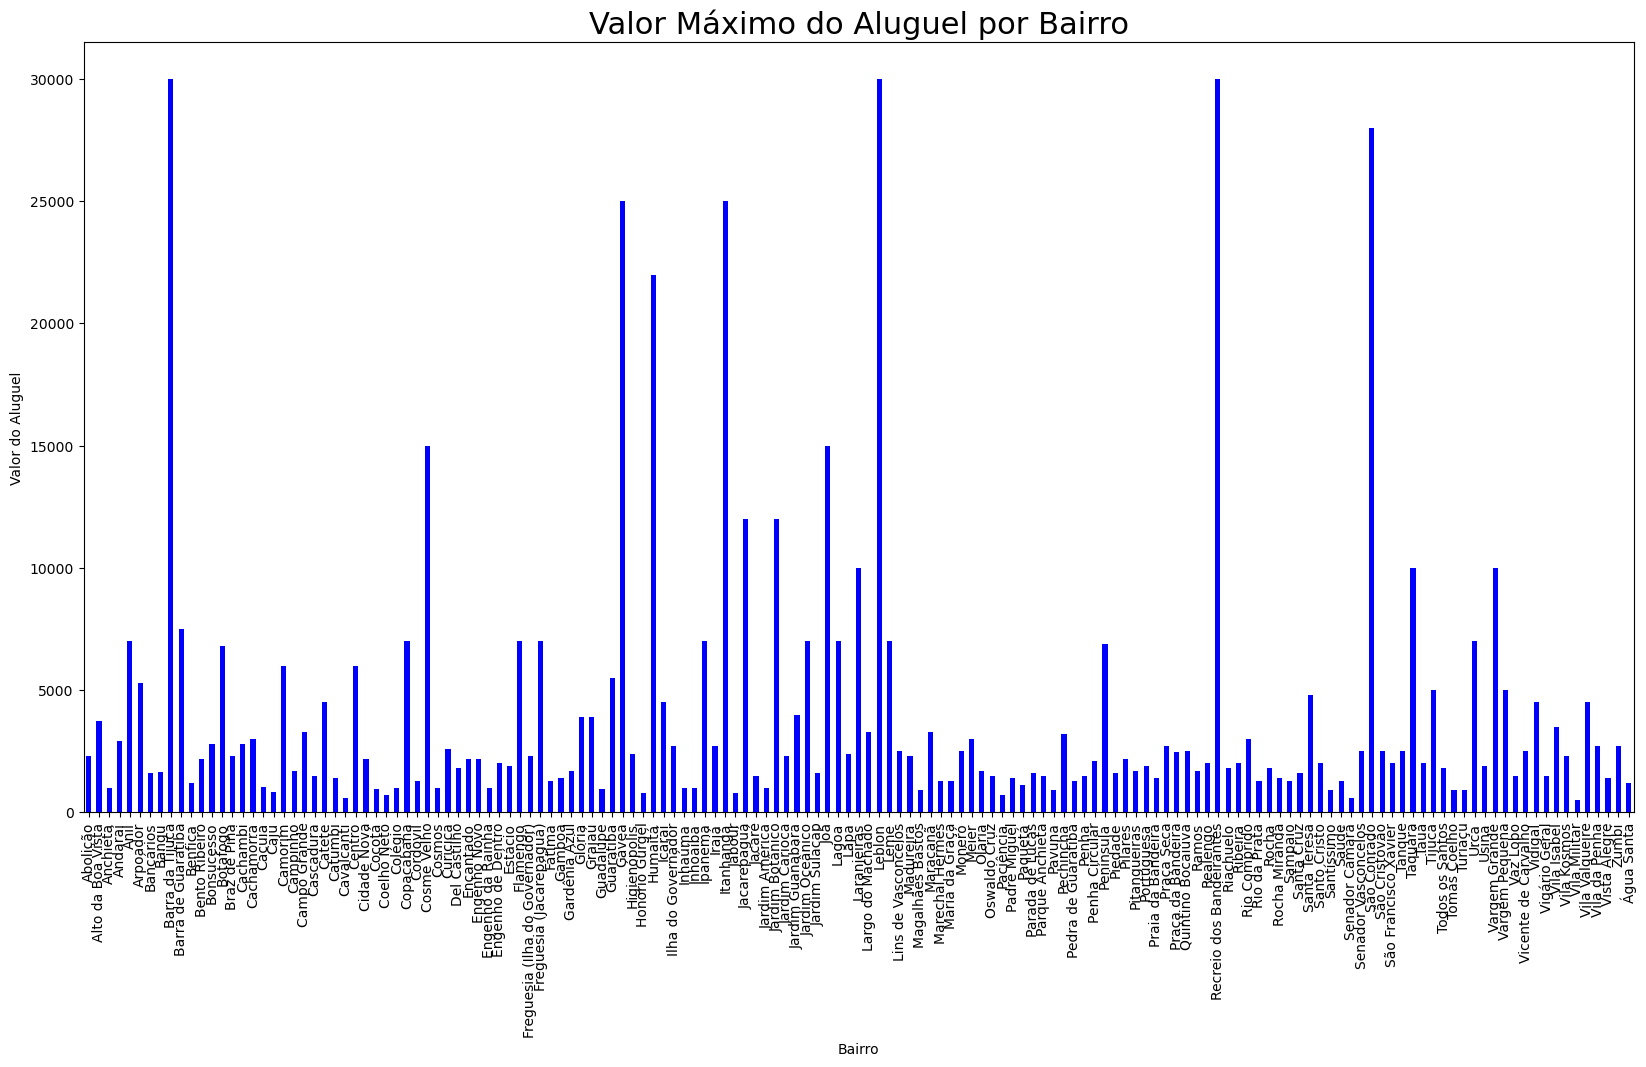

In [792]:
fig = grupo_bairro['Aluguel'].max().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Máximo do Aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Desvio Padrão do Aluguel por Bairro')

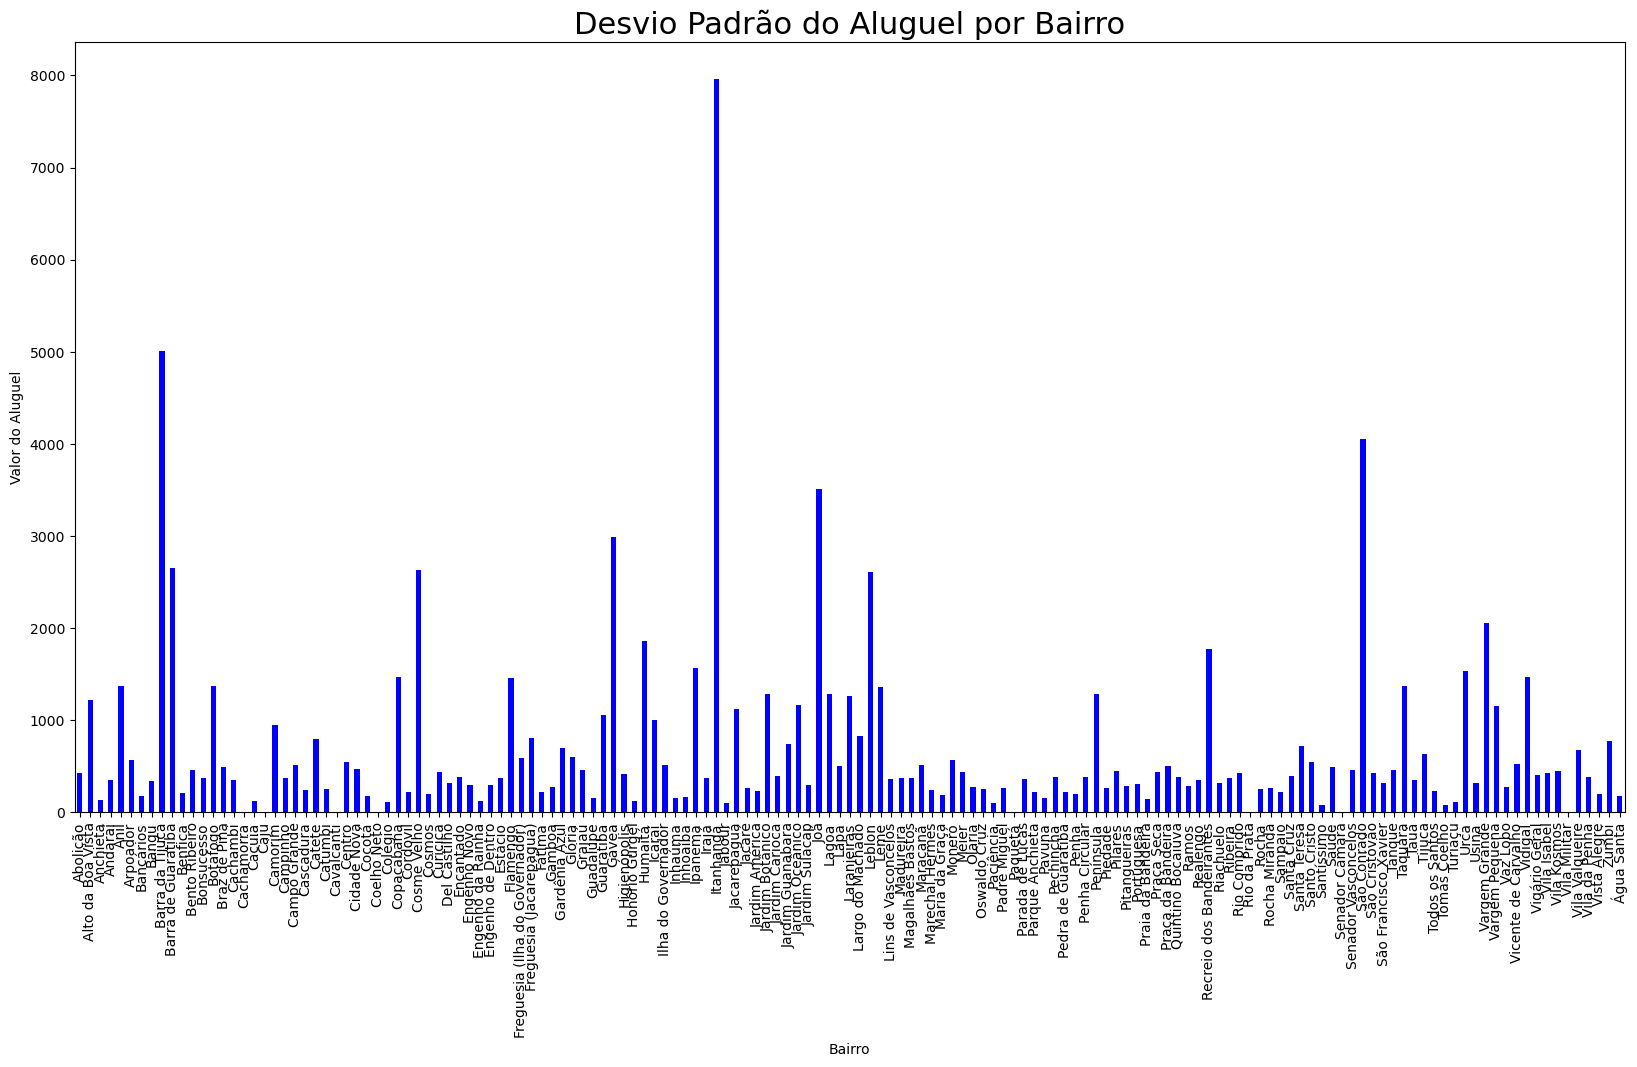

In [793]:
fig = grupo_bairro['Aluguel'].std().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Desvio Padrão do Aluguel por Bairro', {'fontsize': 22})

## 3. Conclusões

O desafio girou em torno dos valores de aluguel de imóveis residenciais, que representam cerca de 66% da base de dados original, aproximadamente 21.500 imóveis divididos em 5 tipos: Apartamento, Quitinete, Casa de Vila, Casa de Condomínio e Casa.

![ImoveisResidenciaisPorTipo](Arquivos_gerados_no_código/ImoveisResidenciaisPorTipo.png)

Houveram muitos indícios que a bases de dados estavam com outliers, como pode ser visto nos histogramas sobre a quantidade de imóveis pelo valor do aluguel e sobre valor de aluguel máximo por bairro. Abaixo estão a versão antes e depois de um tratamento de dados, respectivamente.

![HistogramaFaixasDeAluguel](Arquivos_gerados_no_código/HistogramaFaixasDeAluguelAntes.png)

![HistogramaFaixasDeAluguel](Arquivos_gerados_no_código/HistogramaFaixasDeAluguelDepois.png)

![AluguelMédioPorBairro](Arquivos_gerados_no_código/AluguelMáximoPorBairroAntes.png)

![AluguelMédioPorBairro](Arquivos_gerados_no_código/AluguelMáximoPorBairroDepois.png)

No primeiro histograma só tem uma coluna, o que indica que os dados não estão bem distribuídos. Ao mesmo tempo, no histograma do valor máximo do aluguel antes do tratamento, vemos que alguns valores de aluguel que são muito altos, existe, por exemplo, um apartamento no Botafogo com 4,5 milhões de aluguel. Há uma possibilidade de haver alguns dados com o preço do imóvel, não com o aluguel.

Como pode ser visto no segundo histograma, sobre a quantidade de imóveis pelo valor do aluguel, a distribuição é assimétrico para a direita, o que indica que a moda é menor que a mediana, as quais é menor que a média, o que foi verificado na análise. Esse tipo de resultado é comum de aparecer ao analisar valores e rendas.

Aplicamos a análise do Box Plot, inicialmente, para todos os imóveis residenciais juntos, como pode ser visto abaixo, mas não é a melhor maneira de analisar. Por exemplo, as Casas de Condomínio costumam ter valores maiores de aluguel, em comparação com as Quitinetes ou Apartamentos, então pode acontecer de serem retirados muitos desses valores como outliers, mesmo que sejam dados que representem bem o conjunto das Casas de Condomínio. Por isso, faremos também a análise por tipo de apartamento, para buscar melhores resultados.

![BoxPlotPorTipo](Arquivos_gerados_no_código/BoxPlotGeral.png)

Usando o Box Plot para todos os dados juntos, foram excluídos 4224 imóveis na forma de outliers. Diminuição equivalente à, aproximadamente, 19%.
- Foram 3336 imóveis do tipo "Apartamento". Diminuição equivalente à, aproximadamente, 18%.
- Foram 310 imóveis do tipo "Casa". Diminuição equivalente à, aproximadamente, 32%.
- Foram 573 imóveis do tipo "Casa de Condomínio". Diminuição equivalente à, aproximadamente, 64%.
- Foram 5 imóveis do tipo "Casa de Vila". Diminuição equivalente à, aproximadamente, 2%.
- Foram 0 imóveis do tipo "Quitinete". Diminuição equivalente à, aproximadamente, 0%.

![BoxPlotPorTipo](Arquivos_gerados_no_código/BoxPlotPorTipo.png)

Usando o Box Plot para os dados organizados por tipo, foram excluídos 3495 imóveis na forma de outliers, uma diminuição equivalente à, aproximadamente, 16%.

- Foram 2971 imóveis do tipo "Apartamento". Diminuição equivalente à, aproximadamente, 16%.
- Foram 446 imóveis do tipo "Casa". Diminuição equivalente à, aproximadamente, 46%.
- Foram 28 imóveis do tipo "Casa de Condomínio". Diminuição equivalente à, aproximadamente, 3%.
- Foram 25 imóveis do tipo "Casa de Vila". Diminuição equivalente à, aproximadamente, 10%.
- Foram 25 imóveis do tipo "Quitinete". Diminuição equivalente à, aproximadamente, 3%.

Mesmo usando o Box Plot por tipo de imóvel, as Casas ainda tiveram muitos dados excluídos, então pode ser necessário uma análise de valores superiores e inferiores é uma melhoria que pretendo fazer eventualmente. Outras pontos para melhoria são: Deixar mais apresentável e bonito os títulos e rótulos dos eixos dos gráficos; Melhorar a explicação em alguns trechos, para ficar mais didático; Organizar os bairros, em ordem crescente ou decrescente da média, mediana ou desvio padrão.